<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
import pandas as pd
from datetime import datetime, date
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import plotly.graph_objects as go

import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer
import joblib
#from sklearn.externals import joblib
import math
from scipy.stats import randint
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

import panel as pn
pn.extension('plotly')
pn.extension()

In [2]:
# Código
df_2019 = pd.read_csv('Archivos\SB11_20191.txt', delimiter = "¬", engine='python')
df_2018 = pd.read_csv('Archivos\SB11_20181.txt', delimiter = "¬", engine='python')
df_2017 = pd.read_csv('Archivos\SB11_20171.txt', delimiter = "¬", engine='python')



#### Definicion de columnas

Teniendo en cuenta los diccionarios donde explican los datos, tomamos las columnas que nos permitan hacer un analisis de la forma de vida del estudiante y la relacion que esto puede tener en obtener buenos resultados. Desechamos aquellas columnas que no nos proporcionan información relevante para el analisis.

In [3]:
columnas_principales= ['COLE_NATURALEZA', 'COLE_BILINGUE', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'FAMI_ESTRATOVIVIENDA',
                 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TIENEINTERNET', 'FAMI_NUMLIBROS', 
                 'FAMI_TIENECOMPUTADOR', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'COLE_GENERO',
                 'PUNT_INGLES', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES',
                 'PUNT_SOCIALES_CIUDADANAS',  'PUNT_GLOBAL', 'PERCENTIL_GLOBAL']

df_2019=df_2019[columnas_principales]
df_2019['Ano']=2019

df_2018=df_2018[columnas_principales]
df_2018['Ano']=2018

df_2017=df_2017[columnas_principales]
df_2017['Ano']=2017

#df_2017.append(df_2018, ignore_index = True)


In [4]:
df_2017.head()
print(len(df_2019.index))
print(len(df_2018.index))
print(len(df_2017.index))

21083
12527
12993


In [5]:
df=df_2017.append(df_2018, ignore_index = True)
df=df.append(df_2019, ignore_index = True)

Para efectos de la carga de la informacion se crea un csv, con todos los datos para facilidad de cargue

In [6]:
df.to_csv(r'Archivos\Datos_completos.csv')

In [7]:
df=pd.read_csv('Archivos\Datos_completos.csv', delimiter = ",")
print(len(df.index))

46603


In [8]:
df.head()

Unnamed: 0 COLE_NATURALEZA COLE_BILINGUE ESTU_GENERO ESTU_FECHANACIMIENTO  \
0           0      NO OFICIAL           NaN           M           19/06/2000   
1           1      NO OFICIAL             N           F           02/09/2000   
2           2      NO OFICIAL             N           F           25/05/2000   
3           3      NO OFICIAL           NaN           M           08/02/1999   
4           4      NO OFICIAL             S           F           20/08/1999   

  FAMI_ESTRATOVIVIENDA             FAMI_EDUCACIONPADRE  \
0            Estrato 4  Educación profesional completa   
1            Estrato 5  Educación profesional completa   
2            Estrato 3  Educación profesional completa   
3            Estrato 6  Educación profesional completa   
4            Estrato 5                       Postgrado   

                  FAMI_EDUCACIONMADRE FAMI_TIENEINTERNET     FAMI_NUMLIBROS  \
0                           Postgrado                 Si  MÁS DE 100 LIBROS   
1      Educación profesional completa                 Si    26 A 100 LIBROS   
2    Educación profesional incompleta                 Si    26 A 100 LIBROS   
3  Secundaria (Bachillerato) completa                 Si  MÁS DE 100 LIBROS   
4                           Postgrado                 Si    26 A 100 LIBROS   

   ... ESTU_DEDICACIONINTERNET COLE_GENERO PUNT_INGLES PUNT_LECTURA_CRITICA  \
0  ...       Entre 1 y 3 horas       MIXTO          80                   67   
1  ...          Más de 3 horas    FEMENINO          52                   54   
2  ...       Entre 1 y 3 horas       MIXTO          50                   59   
3  ...          Más de 3 horas       MIXTO          79                   54   
4  ...          Más de 3 horas    FEMENINO          78                   63   

   PUNT_MATEMATICAS  PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  PUNT_GLOBAL  \
0                81                76                        76          377   
1                50                53                        39          246   
2                60                56                        61          292   
3                60                59                        53          291   
4                63                61                        59          314   

   PERCENTIL_GLOBAL   Ano  
0                94  2017  
1                30  2017  
2                53  2017  
3                52  2017  
4                64  2017  

[5 rows x 22 columns]

In [9]:
df['COLE_BILINGUE'].isna().sum()

6800

#### Nueva columna 'Edad'
A partir de los datos de la fecha de nacimiento, encontramos la edad de cada persona

In [10]:
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df['Edad'] = df['ESTU_FECHANACIMIENTO'].apply(age)
  
display(df)

Unnamed: 0 COLE_NATURALEZA COLE_BILINGUE ESTU_GENERO  \
0               0      NO OFICIAL           NaN           M   
1               1      NO OFICIAL             N           F   
2               2      NO OFICIAL             N           F   
3               3      NO OFICIAL           NaN           M   
4               4      NO OFICIAL             S           F   
...           ...             ...           ...         ...   
46598       46598      NO OFICIAL           NaN           F   
46599       46599      NO OFICIAL           NaN           F   
46600       46600      NO OFICIAL           NaN           M   
46601       46601      NO OFICIAL           NaN           M   
46602       46602      NO OFICIAL           NaN           M   

      ESTU_FECHANACIMIENTO FAMI_ESTRATOVIVIENDA  \
0               19/06/2000            Estrato 4   
1               02/09/2000            Estrato 5   
2               25/05/2000            Estrato 3   
3               08/02/1999            Estrato 6   
4               20/08/1999            Estrato 5   
...                    ...                  ...   
46598           06/10/2002            Estrato 3   
46599           03/02/2002            Estrato 5   
46600           17/04/2003            Estrato 2   
46601           14/06/2002            Estrato 3   
46602           11/01/2002            Estrato 3   

                  FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE  \
0      Educación profesional completa                           Postgrado   
1      Educación profesional completa      Educación profesional completa   
2      Educación profesional completa    Educación profesional incompleta   
3      Educación profesional completa  Secundaria (Bachillerato) completa   
4                           Postgrado                           Postgrado   
...                               ...                                 ...   
46598  Educación profesional completa      Técnica o tecnológica completa   
46599             Primaria incompleta      Educación profesional completa   
46600  Educación profesional completa  Secundaria (Bachillerato) completa   
46601  Educación profesional completa      Educación profesional completa   
46602  Técnica o tecnológica completa  Secundaria (Bachillerato) completa   

      FAMI_TIENEINTERNET     FAMI_NUMLIBROS  ... COLE_GENERO PUNT_INGLES  \
0                     Si  MÁS DE 100 LIBROS  ...       MIXTO          80   
1                     Si    26 A 100 LIBROS  ...    FEMENINO          52   
2                     Si    26 A 100 LIBROS  ...       MIXTO          50   
3                     Si  MÁS DE 100 LIBROS  ...       MIXTO          79   
4                     Si    26 A 100 LIBROS  ...    FEMENINO          78   
...                  ...                ...  ...         ...         ...   
46598                 Si     11 A 25 LIBROS  ...       MIXTO          58   
46599                 Si     11 A 25 LIBROS  ...       MIXTO          59   
46600                 Si    26 A 100 LIBROS  ...       MIXTO          63   
46601                 Si    26 A 100 LIBROS  ...       MIXTO          67   
46602                 Si    26 A 100 LIBROS  ...       MIXTO          60   

      PUNT_LECTURA_CRITICA PUNT_MATEMATICAS  PUNT_C_NATURALES  \
0                       67               81                76   
1                       54               50                53   
2                       59               60                56   
3                       54               60                59   
4                       63               63                61   
...                    ...              ...               ...   
46598                   53               64                56   
46599                   51               58                60   
46600                   61               63                56   
46601                   60               58                60   
46602                   59               73                61   

       PUNT_SOCIAL

#### Informacion de datos faltantes

Encontramos la informacion de los datos faltantes por columna.
En este caso decidimos eliminar los datos en la columna con mas faltantes 'Cole_Bilingue' que contenia 6800 faltantes y los demás datos faltantes los imputamos.

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46603 entries, 0 to 46602
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    46603 non-null  int64 
 1   COLE_NATURALEZA               46603 non-null  object
 2   COLE_BILINGUE                 39803 non-null  object
 3   ESTU_GENERO                   46603 non-null  object
 4   ESTU_FECHANACIMIENTO          46603 non-null  object
 5   FAMI_ESTRATOVIVIENDA          44356 non-null  object
 6   FAMI_EDUCACIONPADRE           44478 non-null  object
 7   FAMI_EDUCACIONMADRE           44506 non-null  object
 8   FAMI_TIENEINTERNET            44464 non-null  object
 9   FAMI_NUMLIBROS                44084 non-null  object
 10  FAMI_TIENECOMPUTADOR          45183 non-null  object
 11  ESTU_DEDICACIONLECTURADIARIA  44451 non-null  object
 12  ESTU_DEDICACIONINTERNET       44398 non-null  object
 13  COLE_GENERO     

In [12]:
df.isnull().sum()

Unnamed: 0                         0
COLE_NATURALEZA                    0
COLE_BILINGUE                   6800
ESTU_GENERO                        0
ESTU_FECHANACIMIENTO               0
FAMI_ESTRATOVIVIENDA            2247
FAMI_EDUCACIONPADRE             2125
FAMI_EDUCACIONMADRE             2097
FAMI_TIENEINTERNET              2139
FAMI_NUMLIBROS                  2519
FAMI_TIENECOMPUTADOR            1420
ESTU_DEDICACIONLECTURADIARIA    2152
ESTU_DEDICACIONINTERNET         2205
COLE_GENERO                        0
PUNT_INGLES                        0
PUNT_LECTURA_CRITICA               0
PUNT_MATEMATICAS                   0
PUNT_C_NATURALES                   0
PUNT_SOCIALES_CIUDADANAS           0
PUNT_GLOBAL                        0
PERCENTIL_GLOBAL                   0
Ano                                0
Edad                               0
dtype: int64

In [13]:
df2 = df[df['COLE_BILINGUE'].notna()]

df2.isnull().sum()

Unnamed: 0                         0
COLE_NATURALEZA                    0
COLE_BILINGUE                      0
ESTU_GENERO                        0
ESTU_FECHANACIMIENTO               0
FAMI_ESTRATOVIVIENDA            1810
FAMI_EDUCACIONPADRE             1724
FAMI_EDUCACIONMADRE             1700
FAMI_TIENEINTERNET              1709
FAMI_NUMLIBROS                  2004
FAMI_TIENECOMPUTADOR            1188
ESTU_DEDICACIONLECTURADIARIA    1732
ESTU_DEDICACIONINTERNET         1776
COLE_GENERO                        0
PUNT_INGLES                        0
PUNT_LECTURA_CRITICA               0
PUNT_MATEMATICAS                   0
PUNT_C_NATURALES                   0
PUNT_SOCIALES_CIUDADANAS           0
PUNT_GLOBAL                        0
PERCENTIL_GLOBAL                   0
Ano                                0
Edad                               0
dtype: int64

In [14]:
print(len(df2.index))

39803


In [15]:
class DataFrameImputer(TransformerMixin):

    
    def __init__(self):
        print("Imputacion completa")

    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
df_final = DataFrameImputer().fit_transform(df2)


Imputacion completa


In [16]:
df_final.isnull().sum()
display(df_final)

Unnamed: 0 COLE_NATURALEZA COLE_BILINGUE ESTU_GENERO  \
1               1      NO OFICIAL             N           F   
2               2      NO OFICIAL             N           F   
4               4      NO OFICIAL             S           F   
5               5      NO OFICIAL             S           F   
6               6      NO OFICIAL             N           F   
...           ...             ...           ...         ...   
46395       46395      NO OFICIAL             N           F   
46396       46396      NO OFICIAL             N           F   
46397       46397      NO OFICIAL             N           M   
46398       46398      NO OFICIAL             N           M   
46399       46399      NO OFICIAL             N           F   

      ESTU_FECHANACIMIENTO FAMI_ESTRATOVIVIENDA  \
1               02/09/2000            Estrato 5   
2               25/05/2000            Estrato 3   
4               20/08/1999            Estrato 5   
5               27/07/1999            Estrato 6   
6               22/08/2000            Estrato 2   
...                    ...                  ...   
46395           23/03/2001            Estrato 2   
46396           23/01/2001            Estrato 3   
46397           27/09/1999            Estrato 3   
46398           23/06/2000            Estrato 2   
46399           09/06/2000            Estrato 2   

                        FAMI_EDUCACIONPADRE  \
1            Educación profesional completa   
2            Educación profesional completa   
4                                 Postgrado   
5                                 Postgrado   
6        Secundaria (Bachillerato) completa   
...                                     ...   
46395                               No sabe   
46396                   Primaria incompleta   
46397  Secundaria (Bachillerato) incompleta   
46398        Educación profesional completa   
46399  Secundaria (Bachillerato) incompleta   

                        FAMI_EDUCACIONMADRE FAMI_TIENEINTERNET  \
1            Educación profesional completa                 Si   
2          Educación profesional incompleta                 Si   
4                                 Postgrado                 Si   
5                                 Postgrado                 Si   
6          Educación profesional incompleta                 Si   
...                                     ...                ...   
46395    Secundaria (Bachillerato) completa                 Si   
46396                     Primaria completa                 Si   
46397  Secundaria (Bachillerato) incompleta                 Si   
46398    Secundaria (Bachillerato) completa                 Si   
46399                   Primaria incompleta                 No   

        FAMI_NUMLIBROS  ... COLE_GENERO PUNT_INGLES PUNT_LECTURA_CRITICA  \
1      26 A 100 LIBROS  ...    FEMENINO          52                   54   
2      26 A 100 LIBROS  ...       MIXTO          50                   59   
4      26 A 100 LIBROS  ...    FEMENINO          78                   63   
5      26 A 100 LIBROS  ...       MIXTO          83                   63   
6      26 A 100 LIBROS  ...       MIXTO          49                   53   
...                ...  ...         ...         ...                  ...   
46395    0 A 10 LIBROS  ...       MIXTO          51                   56   
46396    0 A 10 LIBROS  ...       MIXTO          39                   47   
46397    0 A 10 LIBROS  ...       MIXTO          44                   50   
46398   11 A 25 LIBROS  ...       MIXTO          54                   45   
46399   11 A 25 LIBROS  ...       MIXTO          44                   47   

      PUNT_MATEMATICAS  PUNT_C_NATURALES  PUNT_SOCIALES_CIUDADANAS  \
1                   50                53                        39   
2                   60                56                        61   
4                   63                61                        59   
5                   68                69                        63   
6               

Finalmente tenemos un data set con todas las columnas e informacion que vamos a analizar mas adelante.

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

#### Importancia de variables en el puntaje global
A continuacion se presentan diferentes graficos en categorias, que pueden influir en el puntaje global del examen.
Al final de esta seccion estan las conclusiones del ejercicio y de las caracteristicas que son mas relevantes.

In [17]:
df_final=df_final.drop(df_final[df_final['Edad'] > 100].index)


In [18]:
df_final['COLE_NATURALEZA'].unique()

array(['NO OFICIAL', 'OFICIAL'], dtype=object)

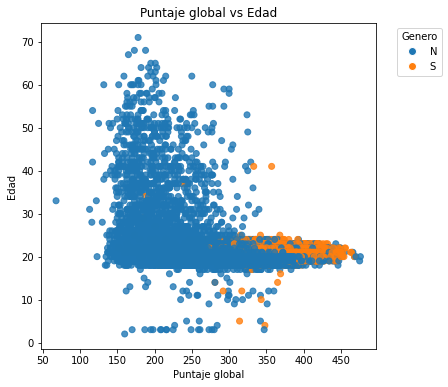

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
#colors = {'MASCULINO':'tab:blue',  'FEMENINO':'tab:pink', 'MIXTO':'tab:orange'}
colors = {'N':'tab:blue',  'S':'tab:orange'}
ax.scatter(df_final['PUNT_GLOBAL'], df_final['Edad'], c=df_final['COLE_BILINGUE'].map(colors), alpha=0.8)
#plt.scatter(df_final['PUNT_GLOBAL'], df_final['Edad'],  alpha=0.5, c=df_final['ESTU_GENERO'], cmap='Greens')
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Genero', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Puntaje global vs Edad")
plt.xlabel("Puntaje global")
plt.ylabel("Edad")
plt.show()

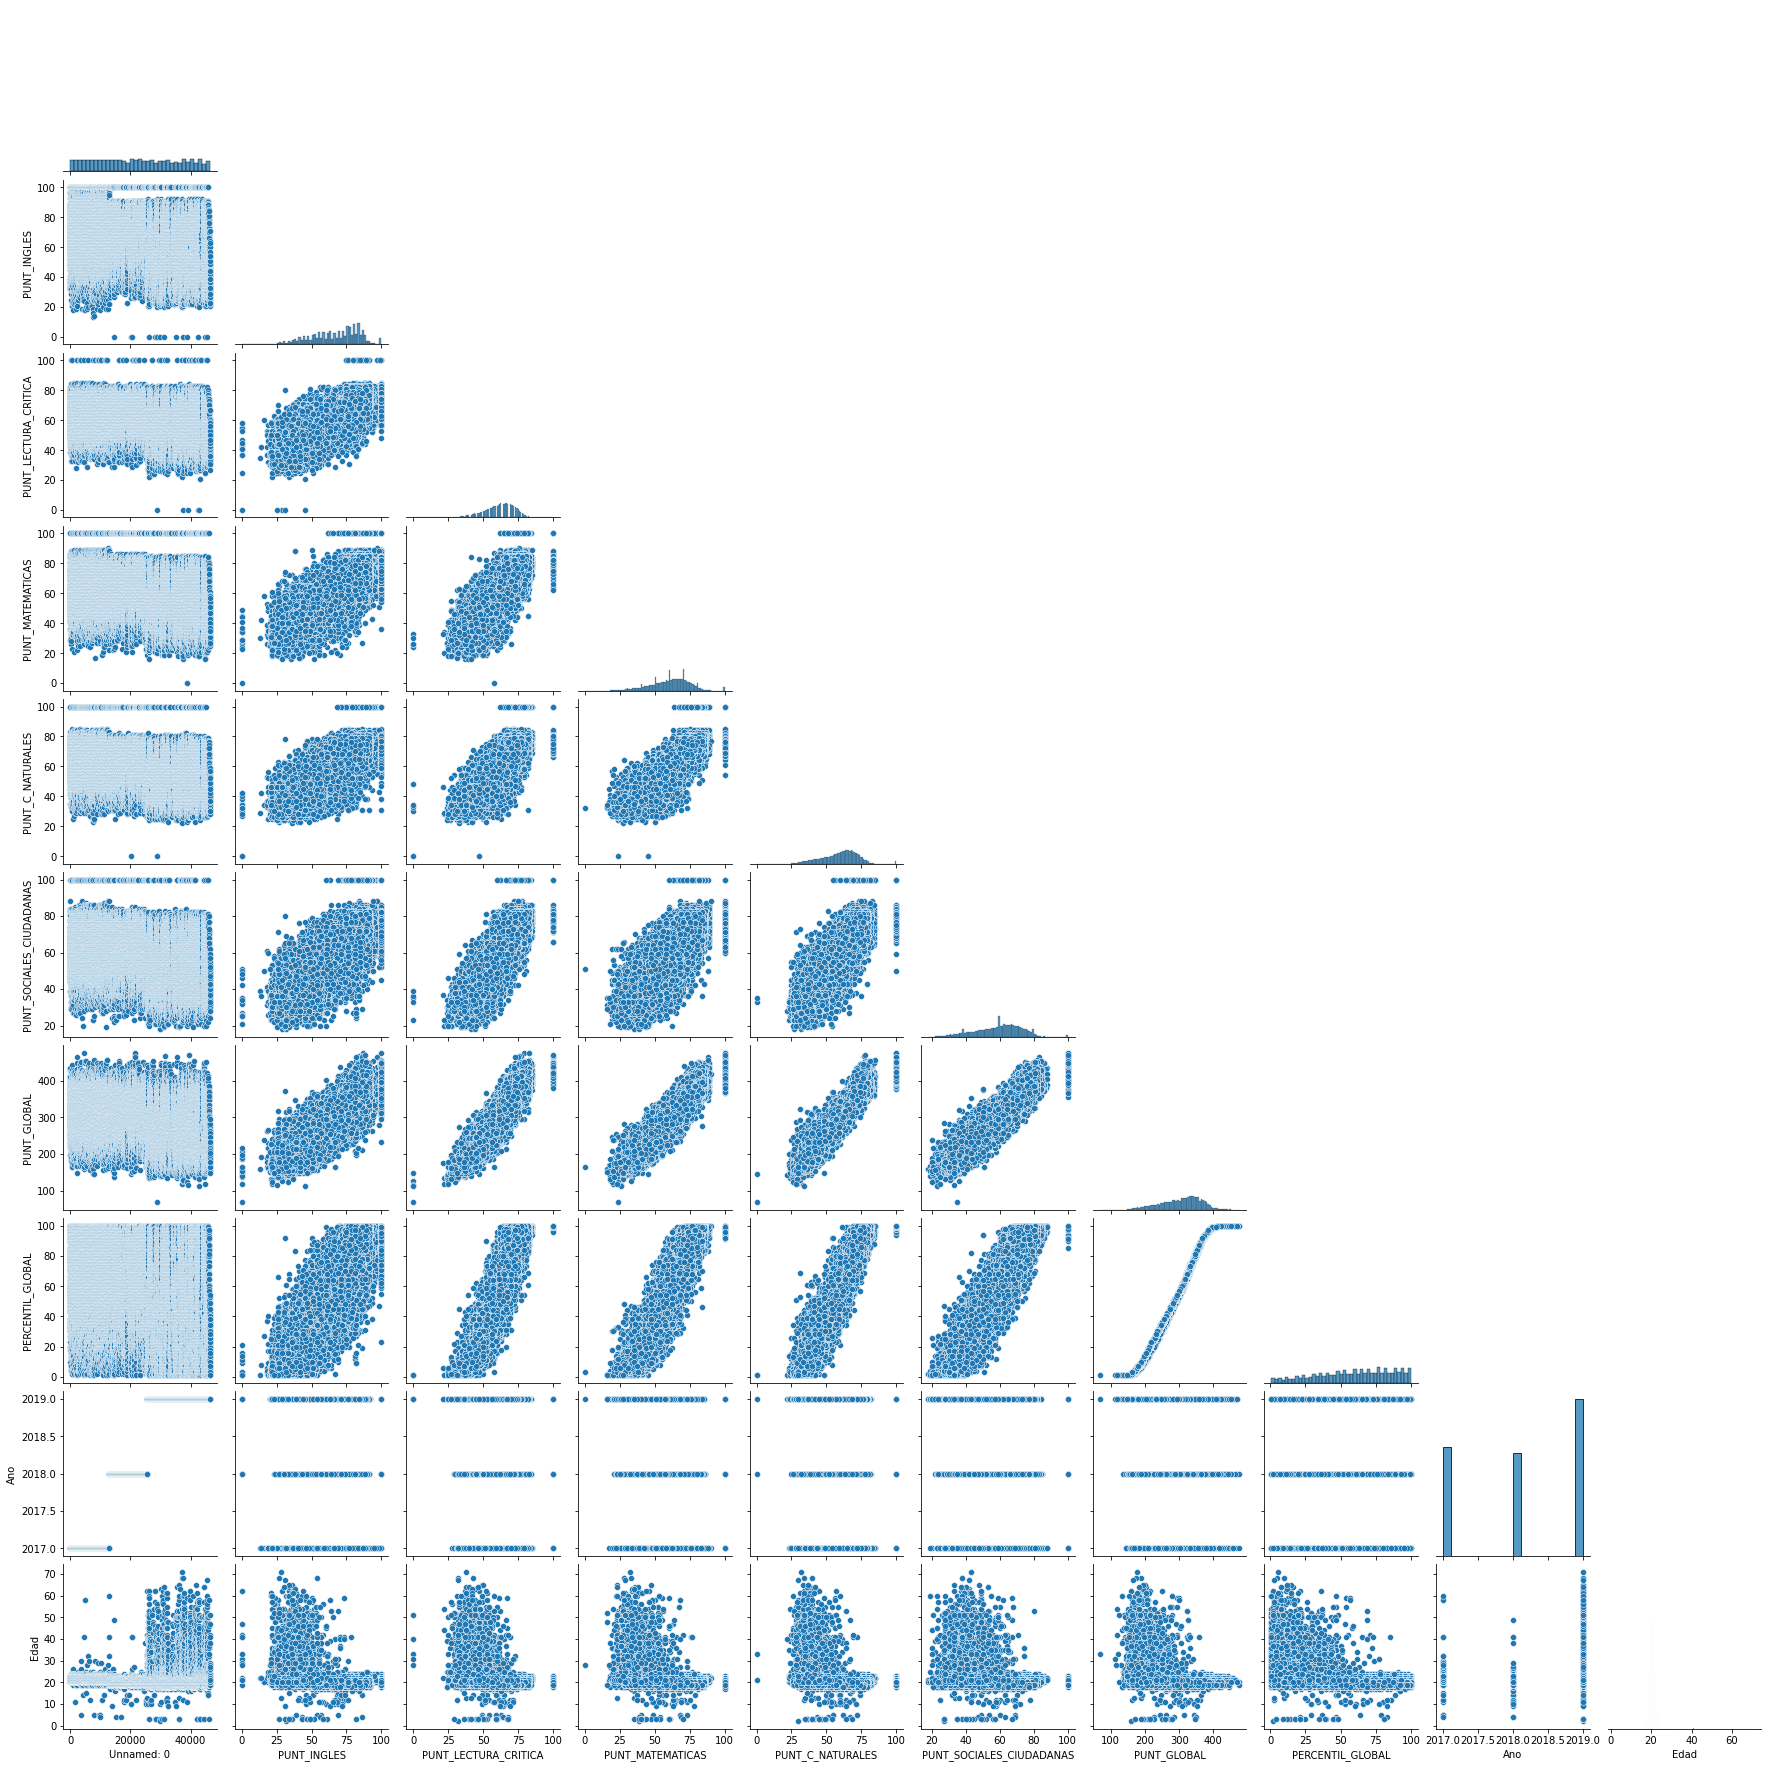

In [20]:

sns.pairplot(df_final,corner=True)

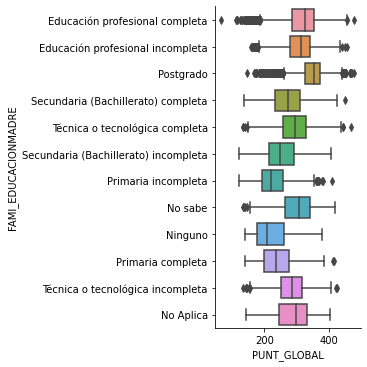

In [21]:
sns.catplot(x="PUNT_GLOBAL", y="FAMI_EDUCACIONMADRE",
            kind="box", data=df_final)

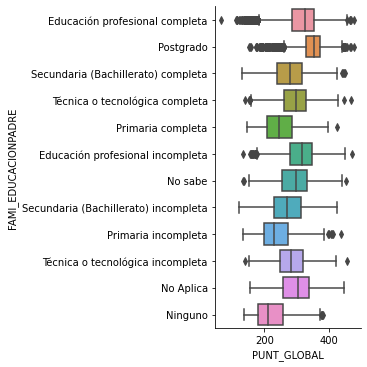

In [22]:
sns.catplot(x="PUNT_GLOBAL", y="FAMI_EDUCACIONPADRE",
            kind="box", data=df_final)

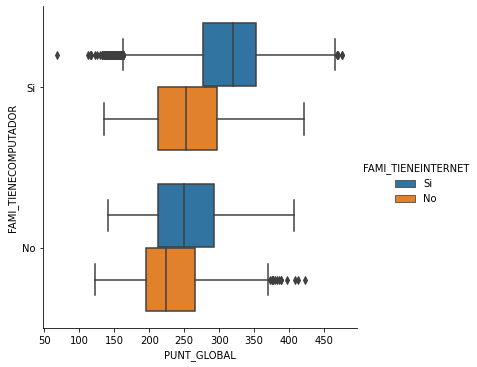

In [23]:
sns.catplot(x="PUNT_GLOBAL", y="FAMI_TIENECOMPUTADOR", hue="FAMI_TIENEINTERNET", kind="box", data=df_final)

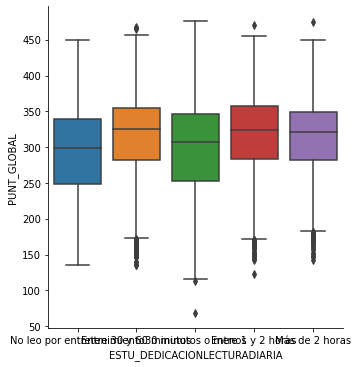

In [24]:
sns.catplot(x="ESTU_DEDICACIONLECTURADIARIA", y="PUNT_GLOBAL",  kind="box", data=df_final)

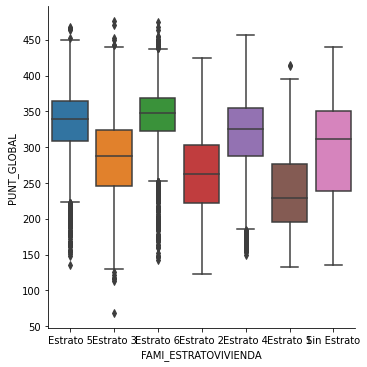

In [25]:
sns.catplot(x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL",  kind="box", data=df_final)

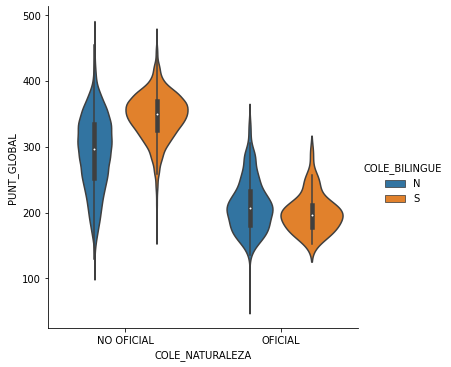

In [26]:
sns.catplot(x="COLE_NATURALEZA", y="PUNT_GLOBAL", hue="COLE_BILINGUE",
            kind="violin", data=df_final)

In [27]:
df_final.corr(method ='kendall')

Unnamed: 0  PUNT_INGLES  PUNT_LECTURA_CRITICA  \
Unnamed: 0                  1.000000    -0.137387             -0.105433   
PUNT_INGLES                -0.137387     1.000000              0.517901   
PUNT_LECTURA_CRITICA       -0.105433     0.517901              1.000000   
PUNT_MATEMATICAS           -0.099432     0.538852              0.566081   
PUNT_C_NATURALES           -0.159502     0.549128              0.588609   
PUNT_SOCIALES_CIUDADANAS   -0.146335     0.539129              0.614238   
PUNT_GLOBAL                -0.117718     0.649751              0.729108   
PERCENTIL_GLOBAL           -0.118801     0.642281              0.720600   
Ano                         0.307837    -0.469966             -0.425307   
Edad                       -0.527205    -0.165348             -0.256988   

                          PUNT_MATEMATICAS  PUNT_C_NATURALES  \
Unnamed: 0                       -0.099432         -0.159502   
PUNT_INGLES                       0.538852          0.549128   
PUNT_LECTURA_CRITICA              0.566081          0.588609   
PUNT_MATEMATICAS                  1.000000          0.653110   
PUNT_C_NATURALES                  0.653110          1.000000   
PUNT_SOCIALES_CIUDADANAS          0.581064          0.633909   
PUNT_GLOBAL                       0.759212          0.787418   
PERCENTIL_GLOBAL                  0.752698          0.778203   
Ano                              -0.426756         -0.483665   
Edad                             -0.254024         -0.229243   

                          PUNT_SOCIALES_CIUDADANAS  PUNT_GLOBAL  \
Unnamed: 0                               -0.146335    -0.117718   
PUNT_INGLES                               0.539129     0.649751   
PUNT_LECTURA_CRITICA                      0.614238     0.729108   
PUNT_MATEMATICAS                          0.581064     0.759212   
PUNT_C_NATURALES                          0.633909     0.787418   
PUNT_SOCIALES_CIUDADANAS                  1.000000     0.766970   
PUNT_GLOBAL                               0.766970     1.000000   
PERCENTIL_GLOBAL                          0.758373     0.957835   
Ano                                      -0.472759    -0.461549   
Edad                                     -0.208221    -0.226186   

                          PERCENTIL_GLOBAL       Ano      Edad  
Unnamed: 0                       -0.118801  0.307837 -0.527205  
PUNT_INGLES                       0.642281 -0.469966 -0.165348  
PUNT_LECTURA_CRITICA              0.720600 -0.425307 -0.256988  
PUNT_MATEMATICAS                  0.752698 -0.426756 -0.254024  
PUNT_C_NATURALES                  0.778203 -0.483665 -0.229243  
PUNT_SOCIALES_CIUDADANAS          0.758373 -0.472759 -0.208221  
PUNT_GLOBAL                       0.957835 -0.461549 -0.226186  
PERCENTIL_GLOBAL                  1.000000 -0.456135 -0.225877  
Ano                              -0.456135  1.000000 -0.556641  
Edad                             -0.225877 -0.556641  1.000000

#### Conclusiones
* De las variables continuas, podemos ver que los puntajes en cada area estan altamente correlacionados con el puntaje global, al igual que el percentil en el que se encuentra el estudiante. Por lo tanto nos enfocaremos en encontrar aquellos factores que impactan en puntaje global y por ende los puntajes por areas.
* De las caracteristicas socio demograficas como: la edad, el genero y el estrato, podemos ver las graficas que no impactan directamente el puntaje global.
* Por otro lado, variables como: Si el colegio es oficial o no lo es, si es bilingue, si el hogar donde vive tiene internet y los estudios de los papas si tienen un impacto en el puntaje. Es decir los factores socio demograficos si afectan los puntajes de los estudiantes.
* Por estas razones creamos un nuevo dataframe con los datos que nos interesan.

In [28]:
columnas_depuradas= ['COLE_NATURALEZA', 'COLE_BILINGUE',  'FAMI_ESTRATOVIVIENDA',
                 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TIENEINTERNET', 'FAMI_NUMLIBROS', 
                 'FAMI_TIENECOMPUTADOR',  'ESTU_DEDICACIONINTERNET', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL']

df_depurado=df_final[columnas_depuradas]

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [29]:

mean=df_depurado['PUNT_GLOBAL'].mean()
print(mean)

304.6931946927163


### Consideraciones

Para este analisis nos interesa conocer la probabilidad que un estudiante obtenga un puntaje global que este por encima de la media, teniendo en cuenta las variables socioeconomicas que vimos en la seccion anterior que eran significantes para el puntaje global.


#### Solucion
Para la solución se incluirá el siguiente proceso:
1. Crear una variable que sea 1 si el puntaje es mayor a la media y 0 si es menor.
2. Dividir el dataframe en la variable dependiente que queremos estimar y las variables independientes.
3. Subdividir los datos 80% para entrenamiento y 20% para pruebas.
4. Codificar las variables categoricas en numericas, asociados a niveles.
3. Entrenar un modelo de clasificacion, Random Forest utilizando una grilla para encontrar los mejores hiperparametros y obtener los mejores resultados posibles para el clasificador.
4. Prueba de bondad del modelo.


De esta manera buscamos predecir si el estudiante va a obtener un puntaje por encima o por debajo de la media.

In [30]:
#df_depurado['GRUPO_PERCENTIL']=pd.cut(df_depurado.PERCENTIL_GLOBAL,bins=[1,19,39,59,79,101],labels=['5','4','3','2', '1'])

df_depurado['SUPERACION_MEDIA'] = np.where(df_depurado['PUNT_GLOBAL']>mean , 1, 0)


c:\users\maflecha\documents\mis pruebas\jupyter\jupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
x=df_depurado[['COLE_NATURALEZA', 'COLE_BILINGUE',  'FAMI_ESTRATOVIVIENDA',
                 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TIENEINTERNET', 'FAMI_NUMLIBROS', 
                 'FAMI_TIENECOMPUTADOR',  'ESTU_DEDICACIONINTERNET']]
y=df_depurado['SUPERACION_MEDIA']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

In [33]:
X_train=X_train.apply(LabelEncoder().fit_transform)
X_test=X_test.apply(LabelEncoder().fit_transform)

In [34]:
X_train.head()

COLE_NATURALEZA  COLE_BILINGUE  FAMI_ESTRATOVIVIENDA  \
34665                0              0                     2   
17044                0              1                     4   
34065                0              0                     2   
33153                0              1                     3   
15792                0              0                     4   

       FAMI_EDUCACIONPADRE  FAMI_EDUCACIONMADRE  FAMI_TIENEINTERNET  \
34665                   10                    1                   0   
17044                    0                    5                   1   
34065                    9                    9                   1   
33153                    0                    0                   1   
15792                    0                    0                   1   

       FAMI_NUMLIBROS  FAMI_TIENECOMPUTADOR  ESTU_DEDICACIONINTERNET  
34665               2                     0                        2  
17044               2                     1                        1  
34065               0                     0                        3  
33153               2                     1                        3  
15792               2                     1                        2

In [36]:
df_depurado['SUPERACION_MEDIA'].unique()

array([0, 1])

In [37]:
len(X_test)

7944

In [38]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
parameters = {
    "max_depth": range(1, 11),
    "min_samples_split": range(2, 21),
    "min_samples_leaf": range(1, 5),
    "criterion":["gini", "entropy"]
}

clf = RandomizedSearchCV(model, parameters, cv = 5, n_iter = 100)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 11),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 21)})

In [39]:
clf.best_estimator_ 

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=8,
                       random_state=0)

#### Resultados

In [40]:
y_pred = clf.predict(X_test)

In [41]:
clf.score(X_test, y_test)

0.7781973816717019

In [42]:
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[3391  970]
 [ 792 2791]]


In [43]:
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.78      0.79      4361
           0       0.74      0.78      0.76      3583

    accuracy                           0.78      7944
   macro avg       0.78      0.78      0.78      7944
weighted avg       0.78      0.78      0.78      7944



In [44]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

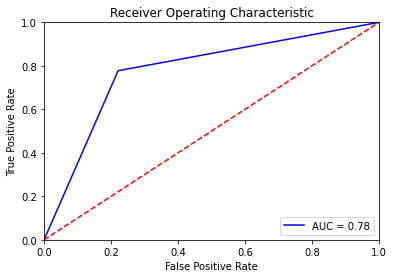

In [45]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusiones
 * Con los resultados obtenidos del modelo, podemos ver que el modelo tiene una buena capacidad de clasificacion. Adicionalmente podemos ver que es ligeramente mejor para categorizar a los estudiantes que obtendran un puntaje mayor a la media.
 * Si quisieramos mejorar el modelo podrian incluirse datos como: las notas de bachillerato, el tiempo dedicado al estudio, ect.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [85]:
titulo = 'Seleccion de variables'
SeleccionVariables = pn.widgets.MultiChoice(name='SeleccionVariables',
                                            value=['COLE_NATURALEZA','COLE_BILINGUE'],
                                            options=['COLE_NATURALEZA', 'COLE_BILINGUE',  'FAMI_ESTRATOVIVIENDA',
                                                     'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TIENEINTERNET', 
                                                     'FAMI_NUMLIBROS', 'FAMI_TIENECOMPUTADOR',  'ESTU_DEDICACIONINTERNET'])

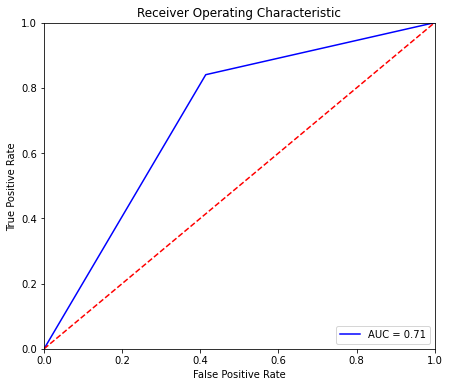

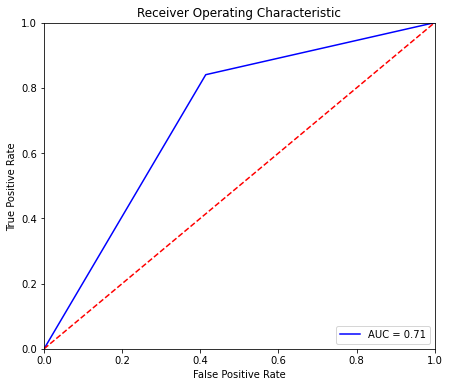

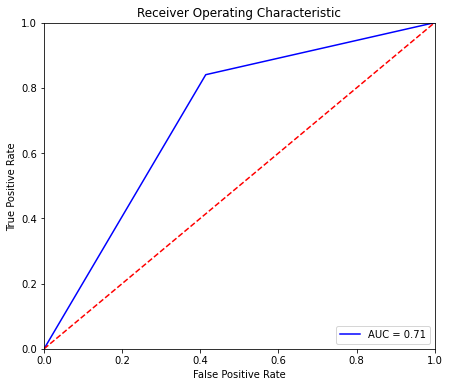

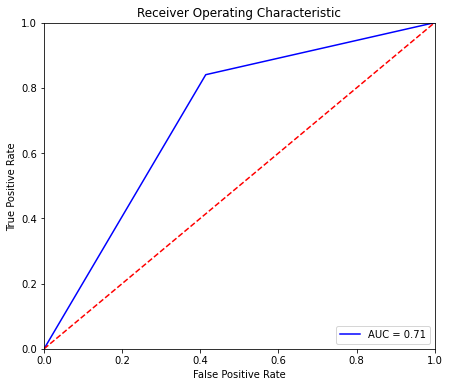

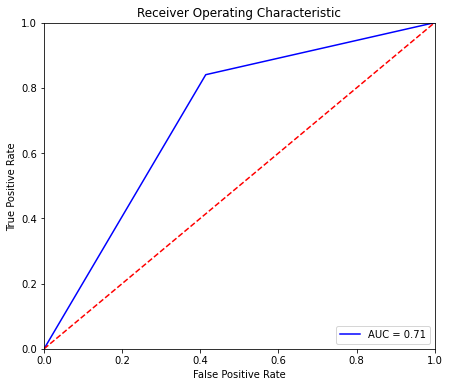

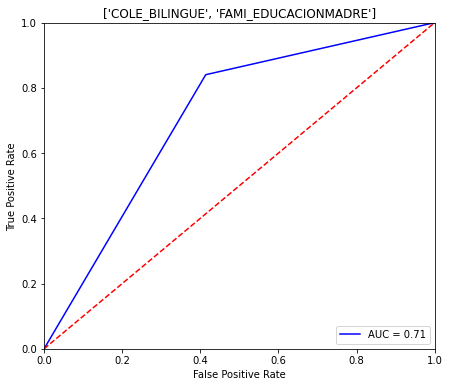

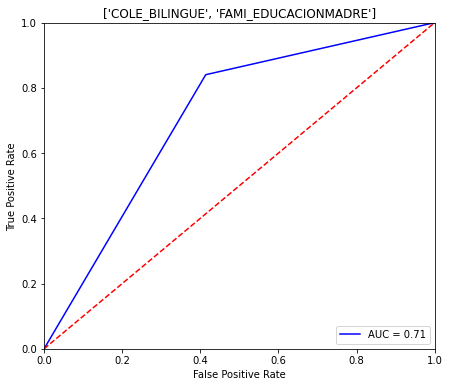

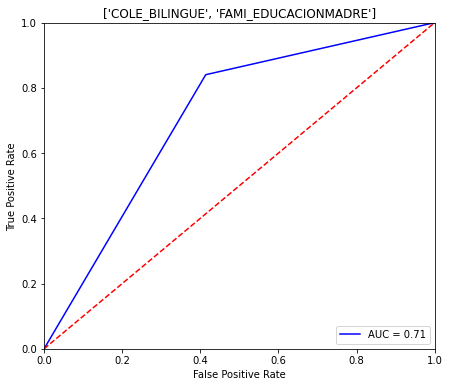

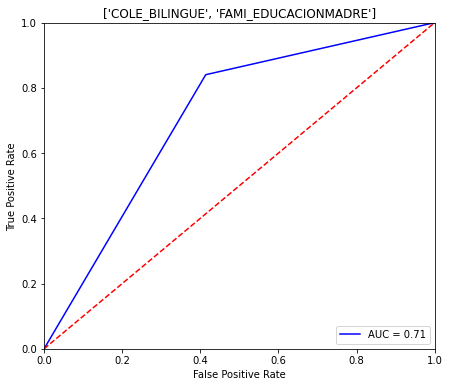

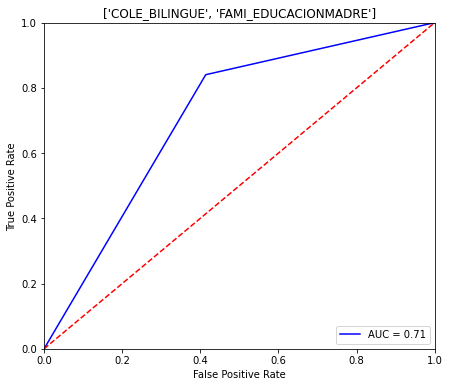

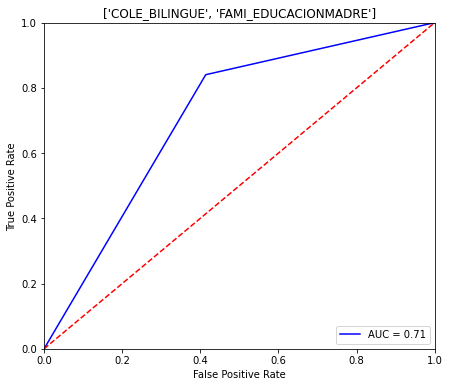

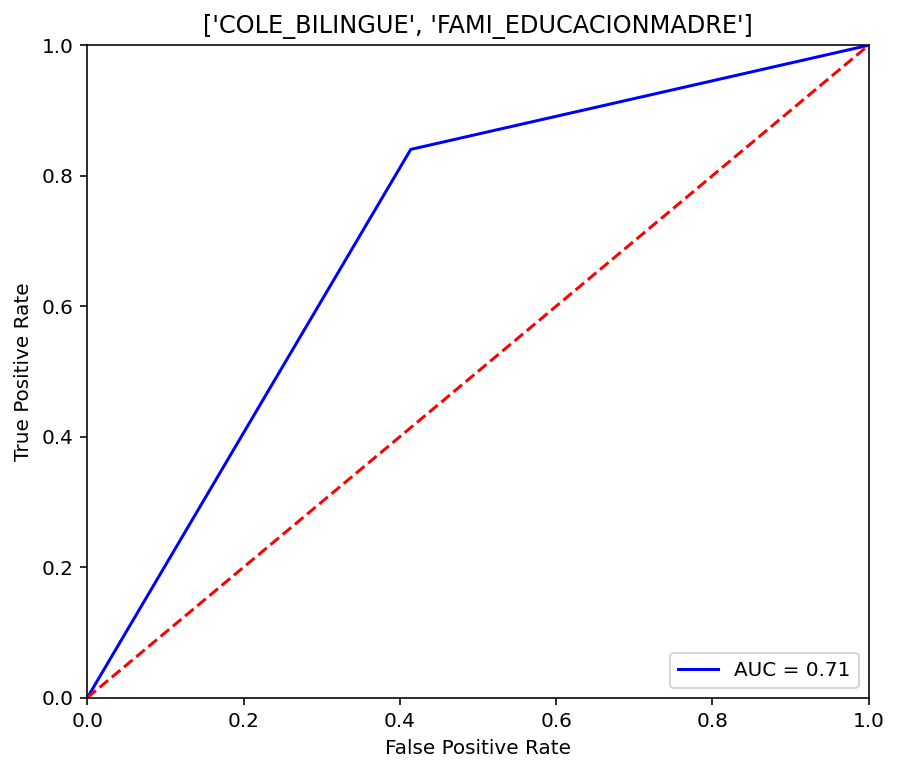

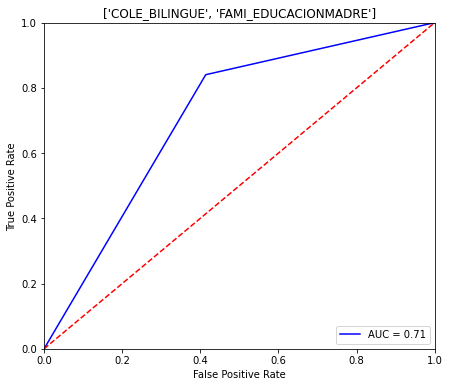

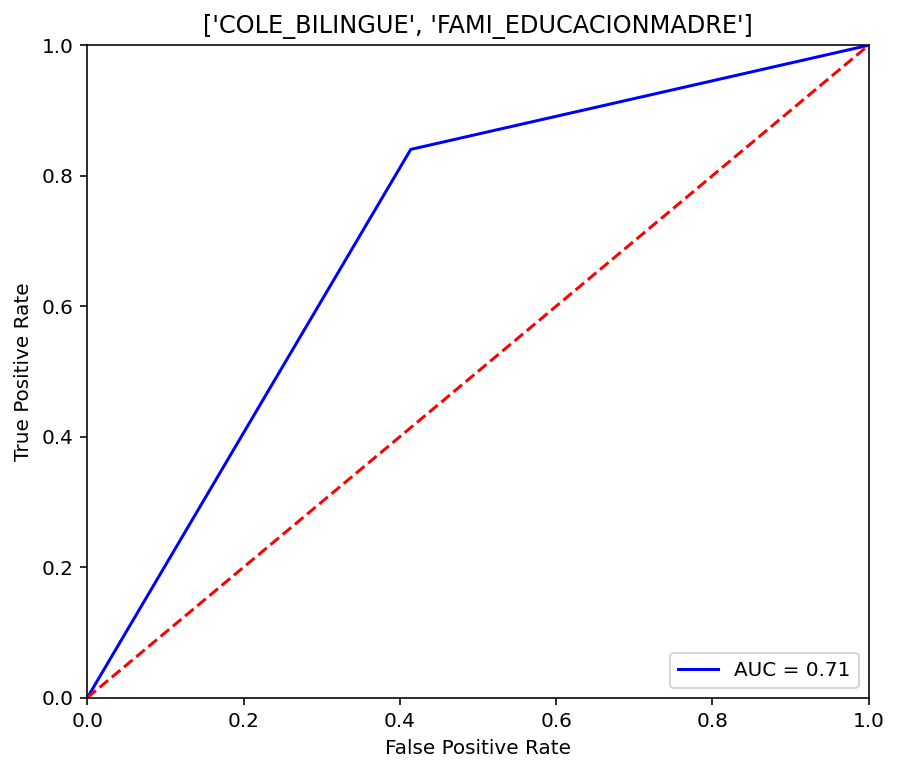

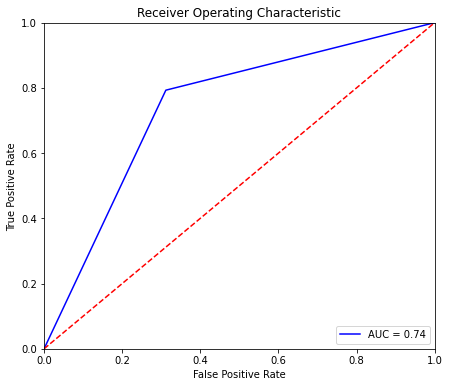

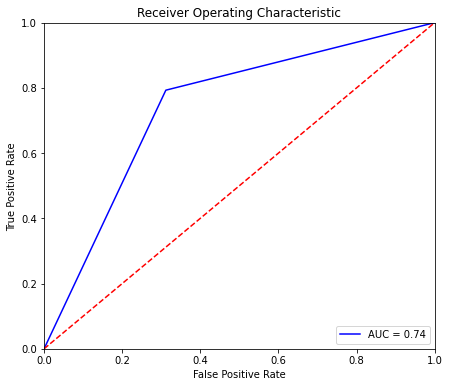

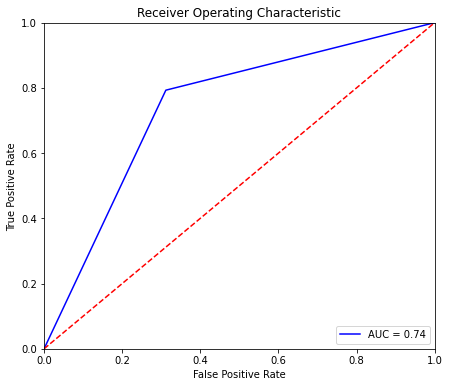

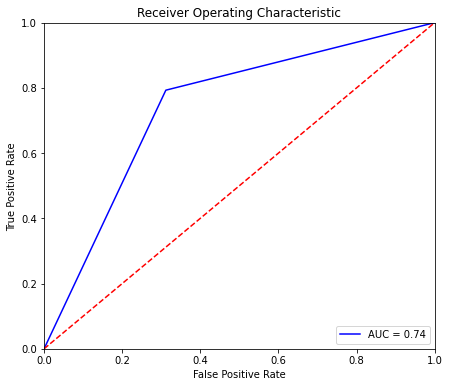

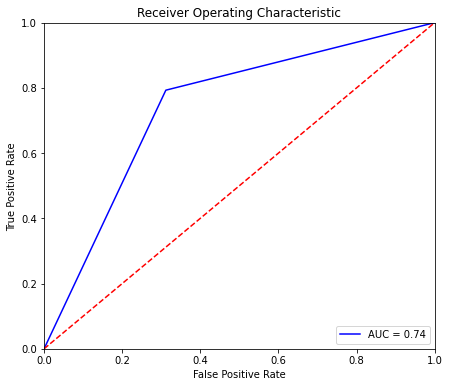

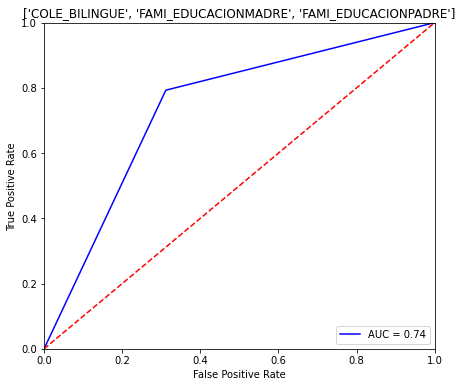

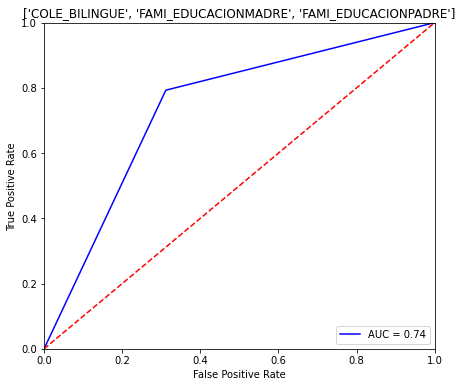

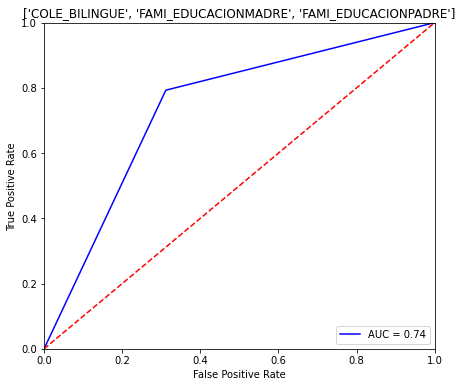

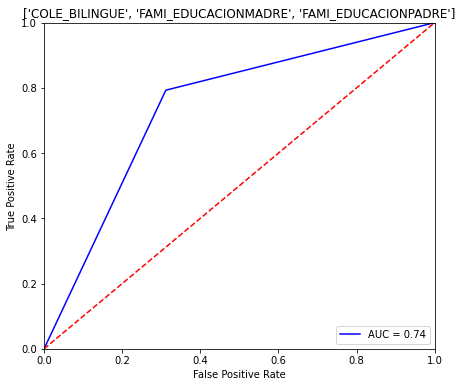

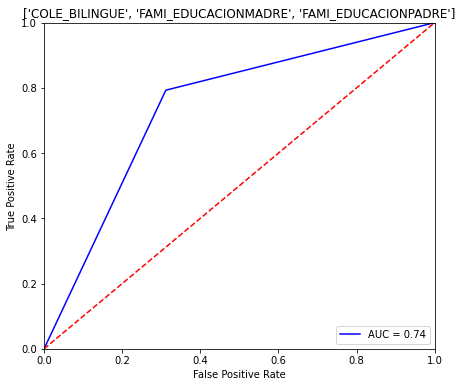

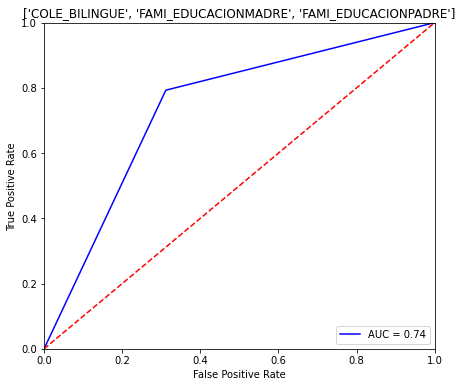

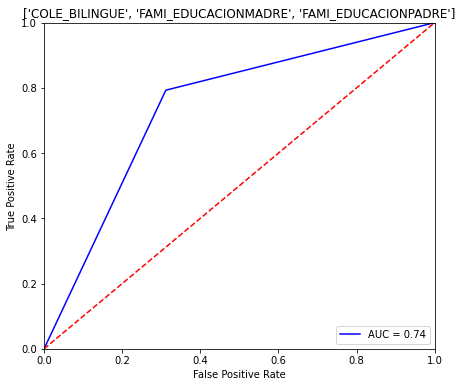

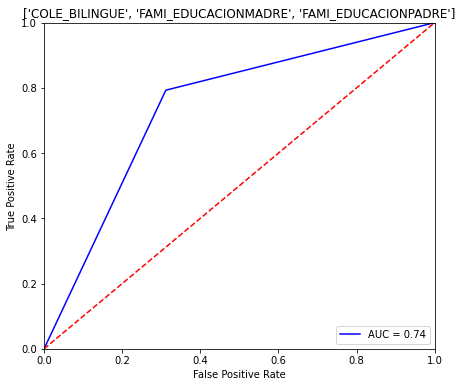

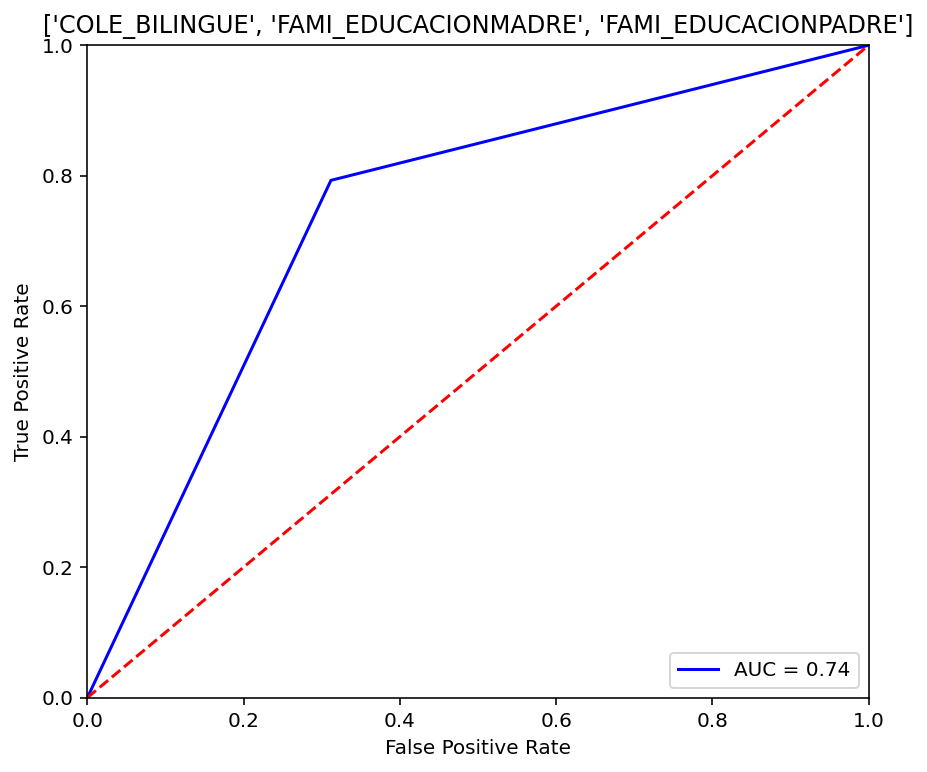

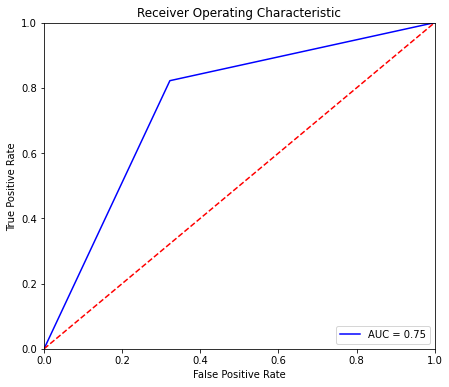

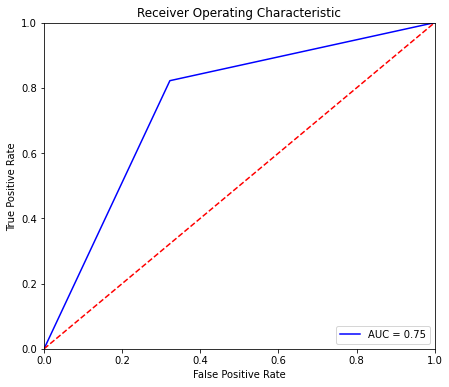

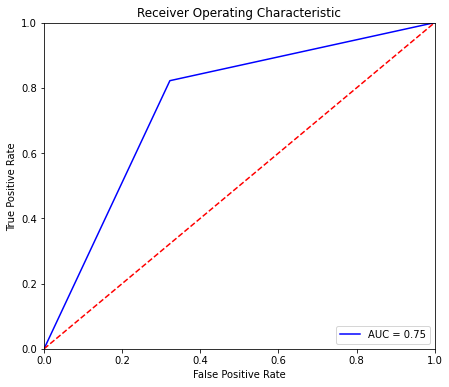

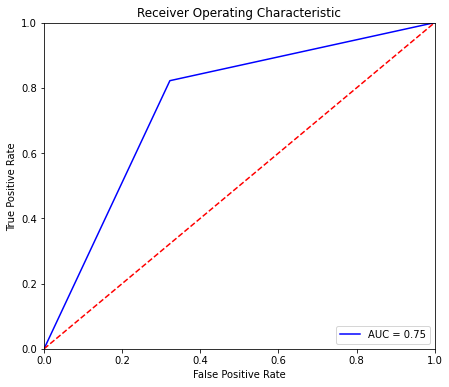

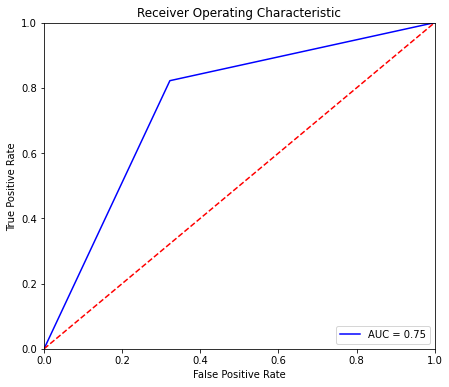

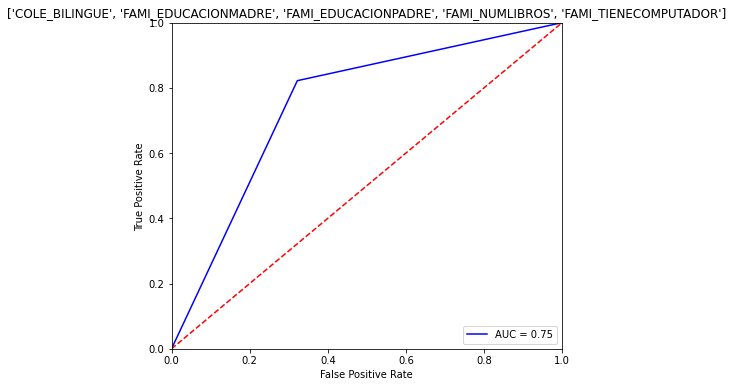

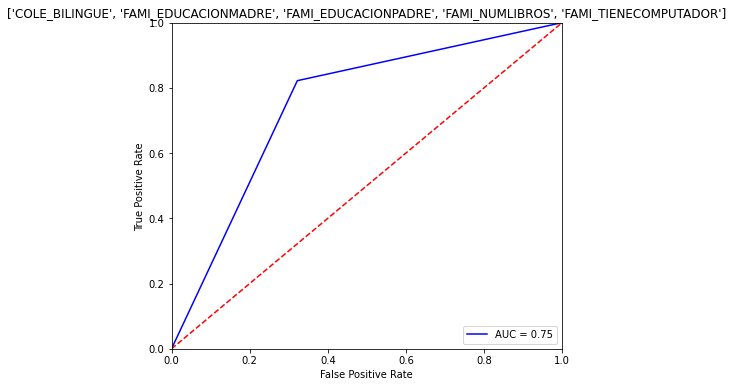

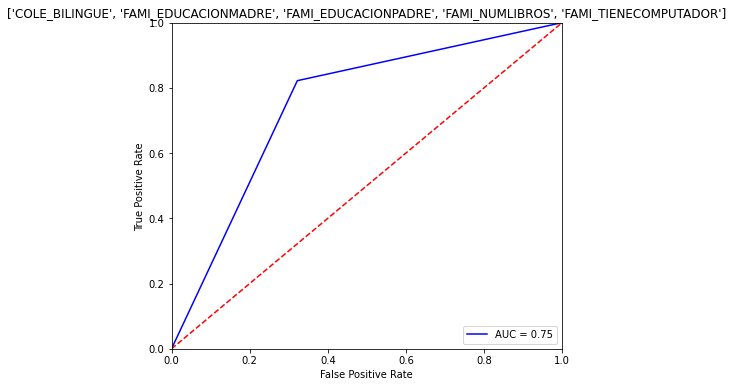

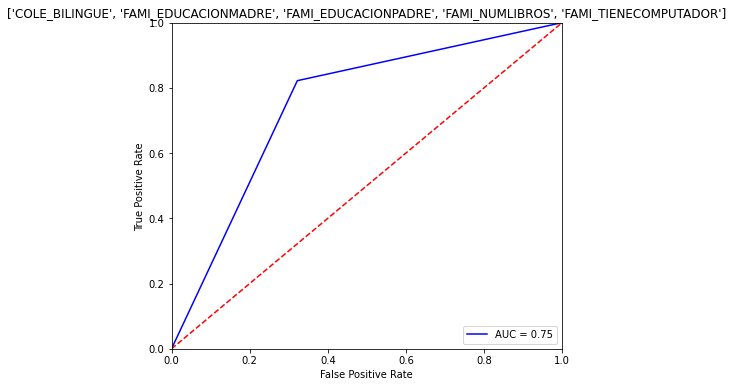

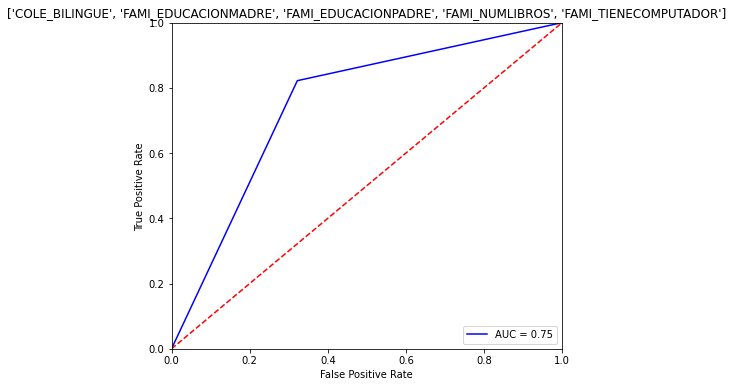

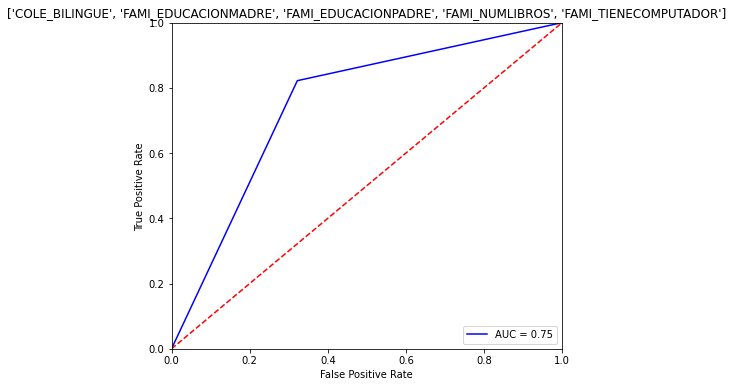

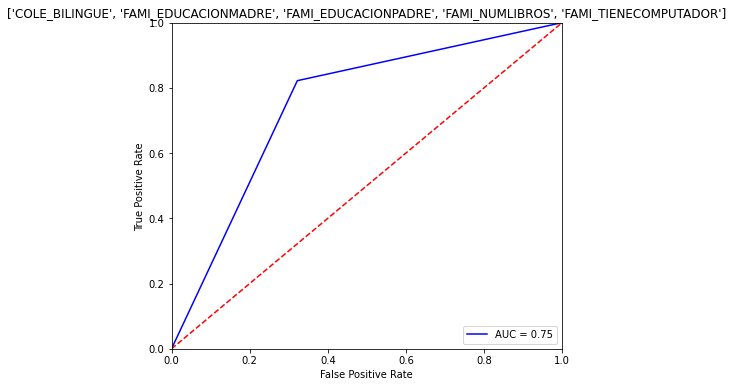

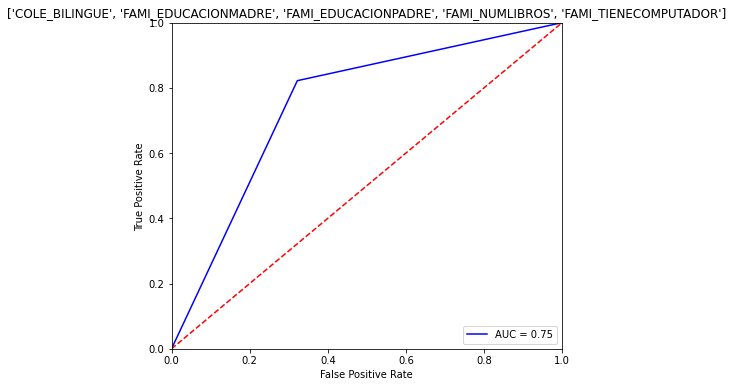

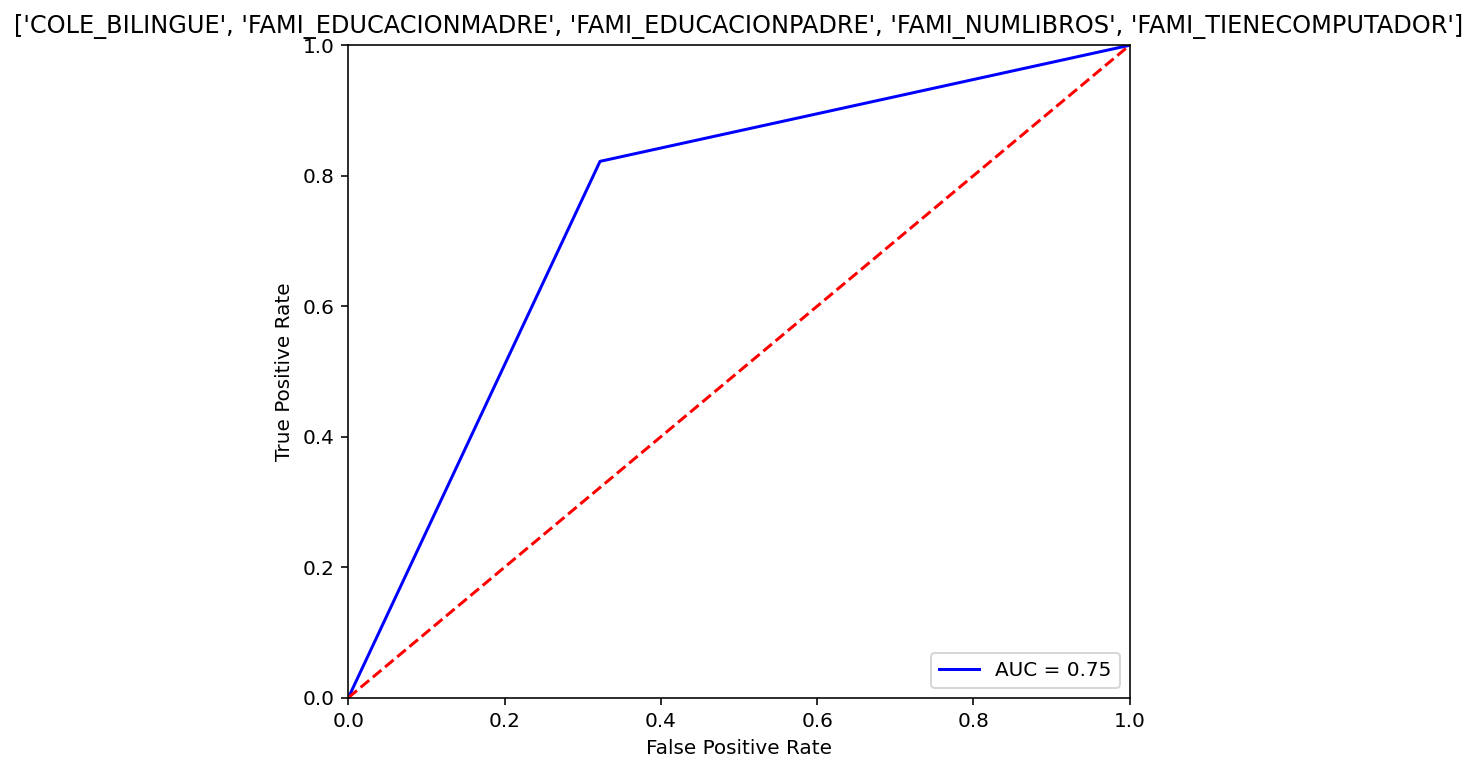

In [122]:
@pn.depends(SeleccionVariables)

def funcion_interactiva(SeleccionVariables): 
    
    
    
    x=df_depurado[SeleccionVariables]
    y=df_depurado['SUPERACION_MEDIA']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)
    
    X_train=X_train.apply(LabelEncoder().fit_transform)
    X_test=X_test.apply(LabelEncoder().fit_transform)
    
    
    model = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth=10, min_samples_split=7, random_state=0)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score=model.score(X_test, y_test)
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    
    title=SeleccionVariables
    plot = plt.figure(figsize=(7, 6))
    ax = plot.add_subplot(111)
    ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc = 'lower right')
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')  
    
    return plot



In [123]:
@pn.depends(SeleccionVariables)
def matr(SeleccionVariables): 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score=model.score(X_test, y_test)

    return score

In [124]:
@pn.depends(SeleccionVariables)
def variables(SeleccionVariables): 
 
    
    return SeleccionVariables

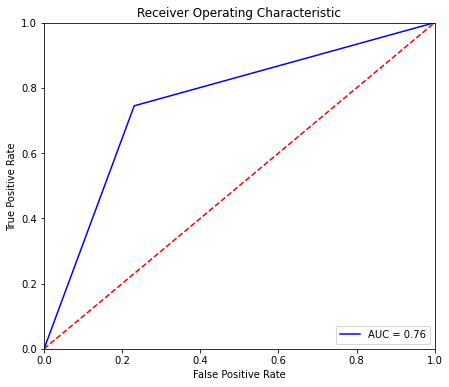

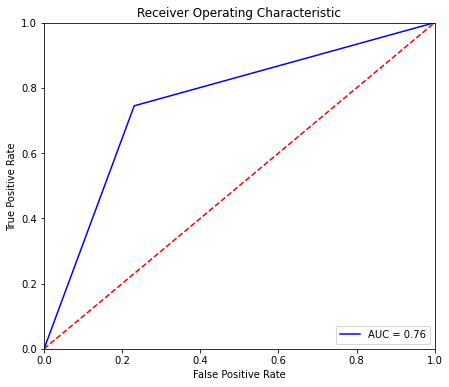

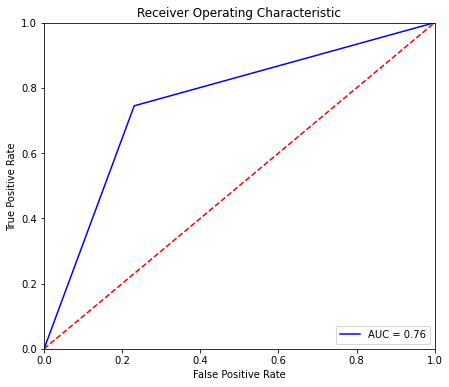

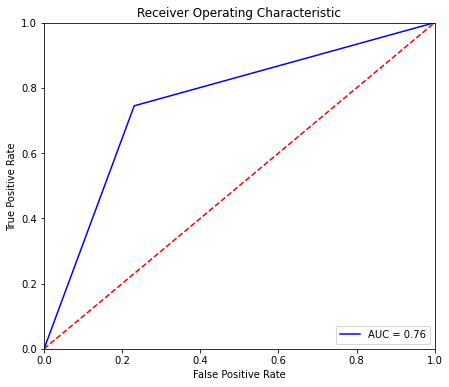

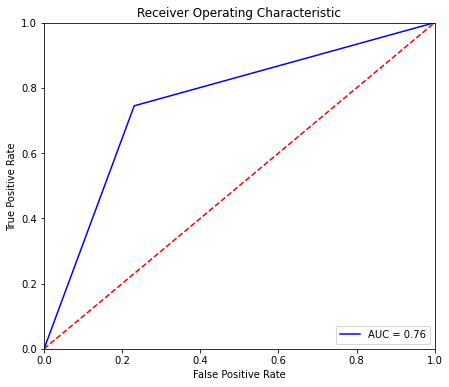

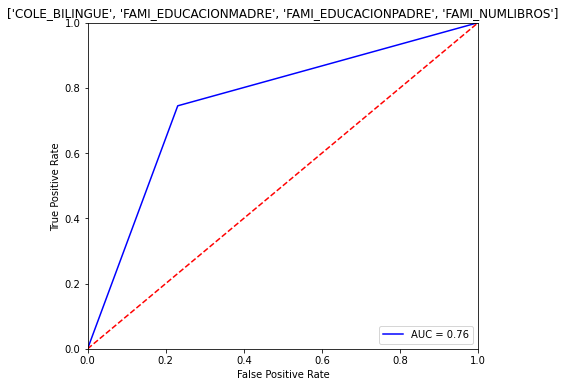

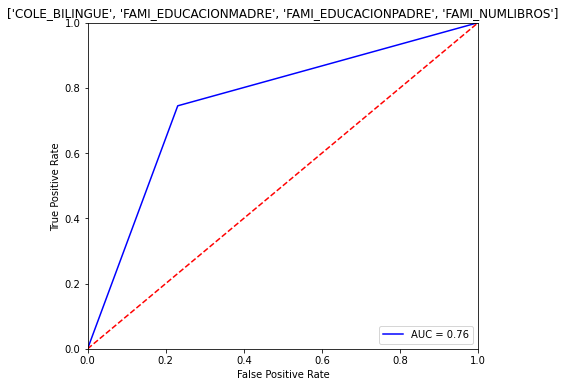

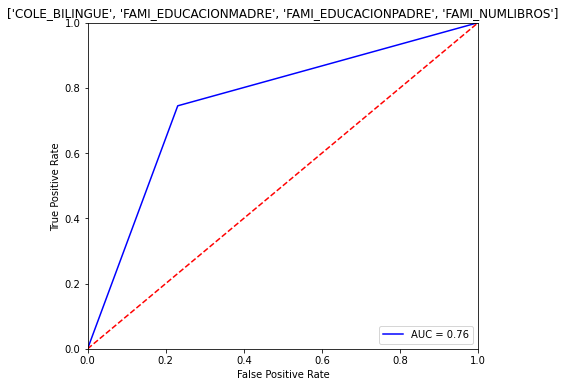

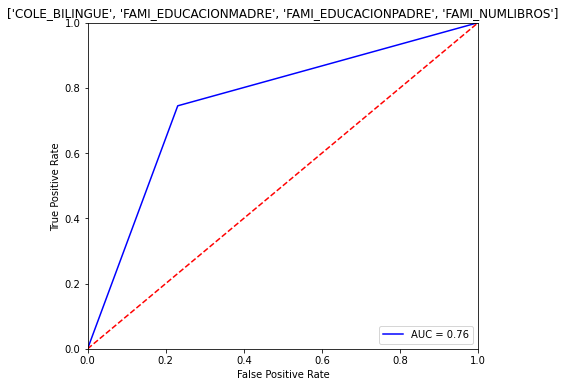

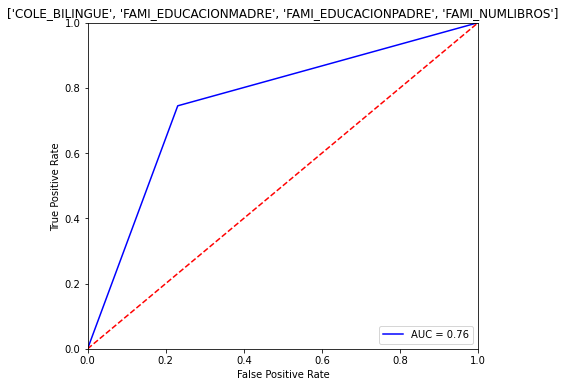

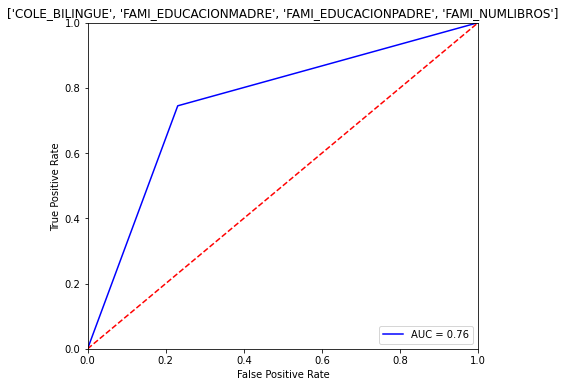

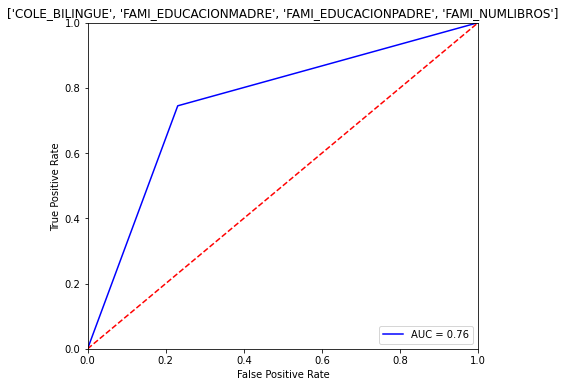

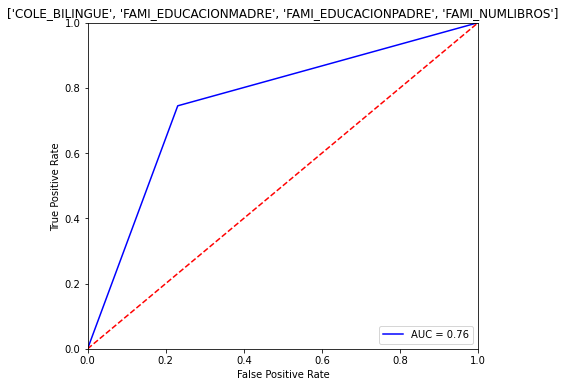

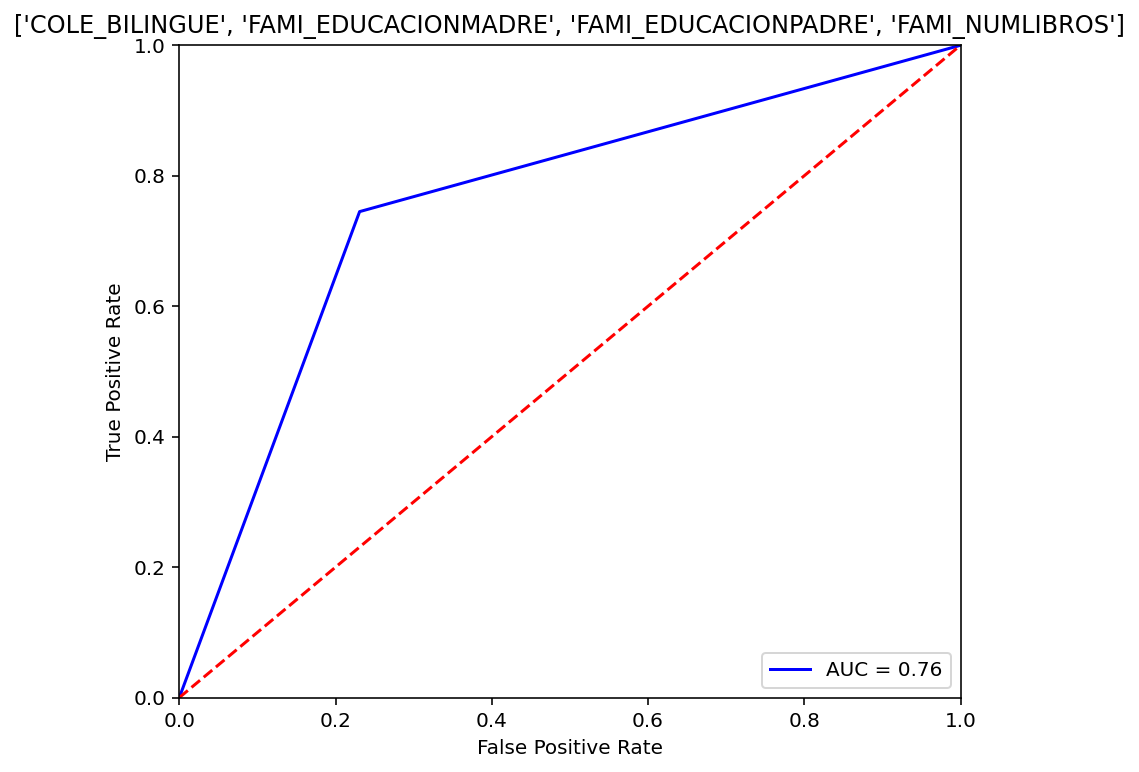

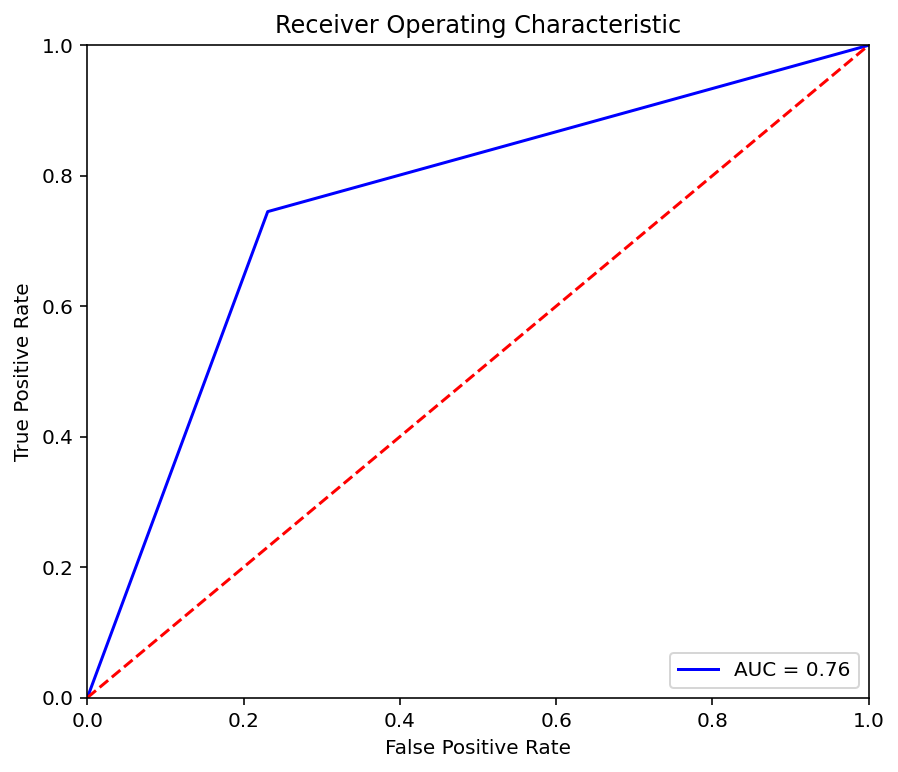

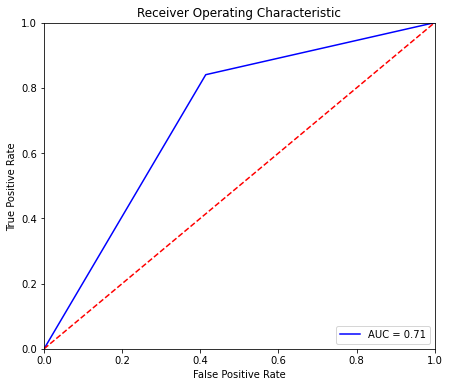

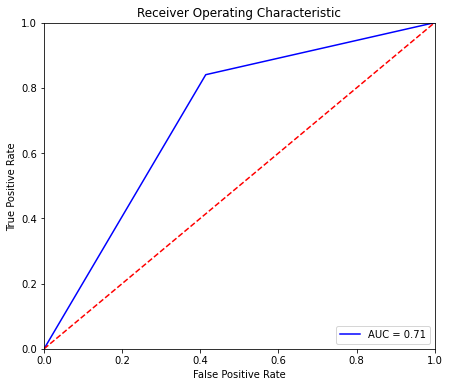

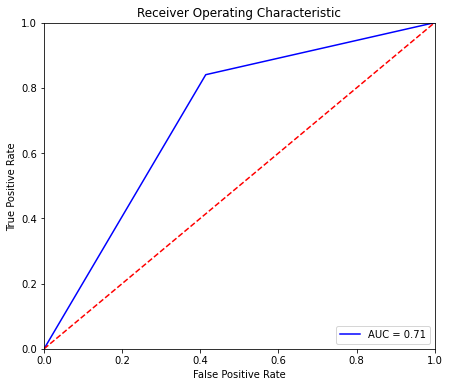

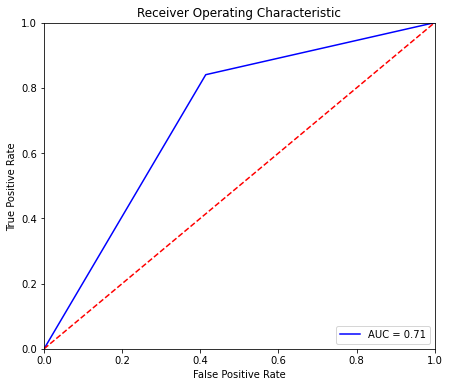

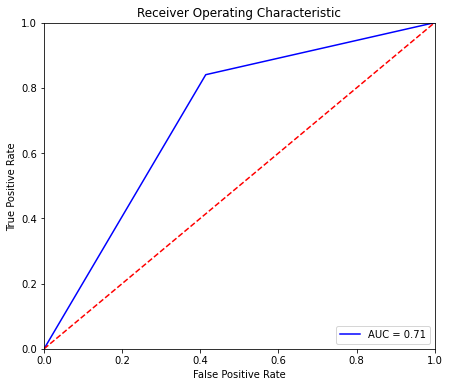

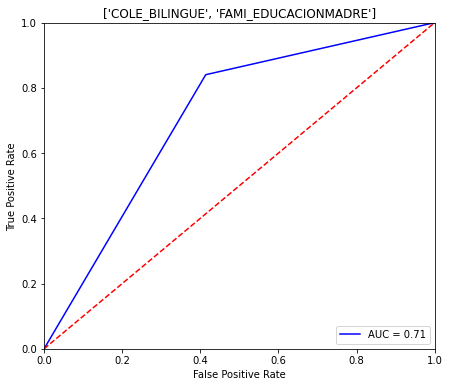

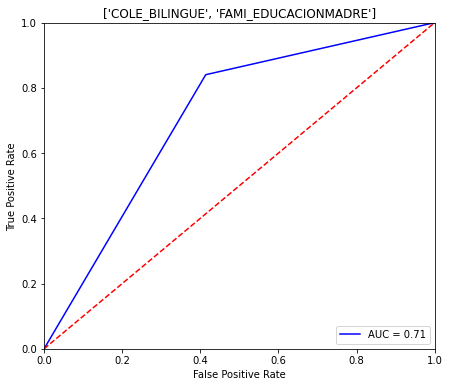

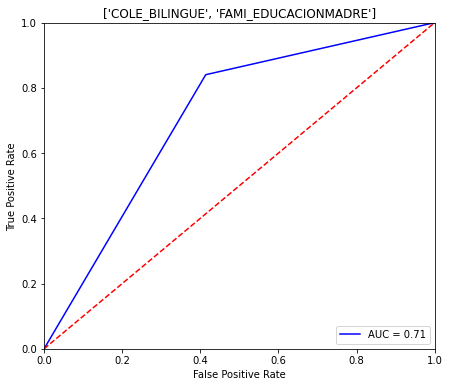

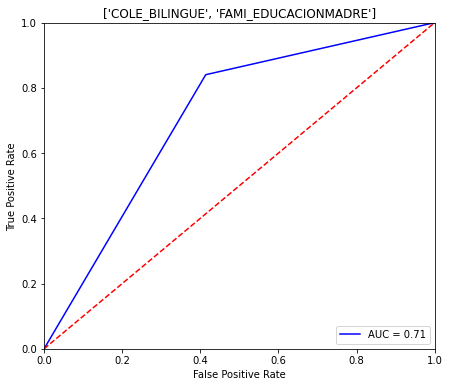

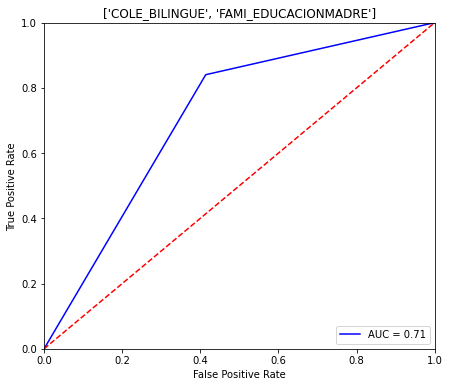

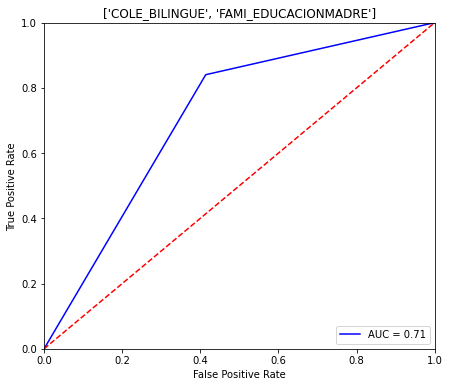

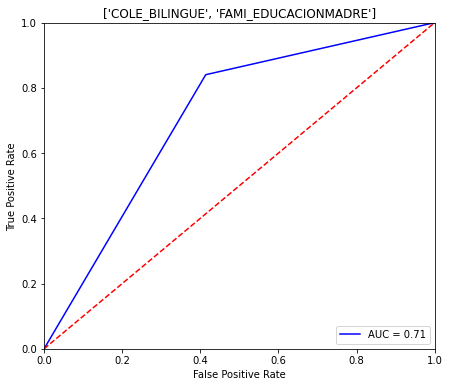

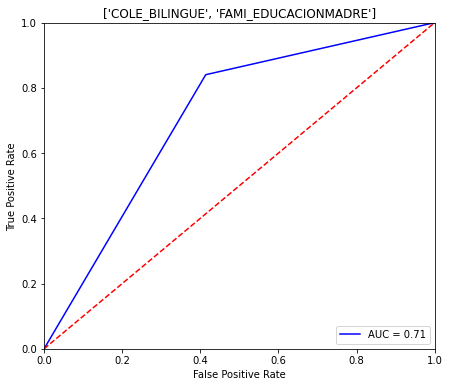

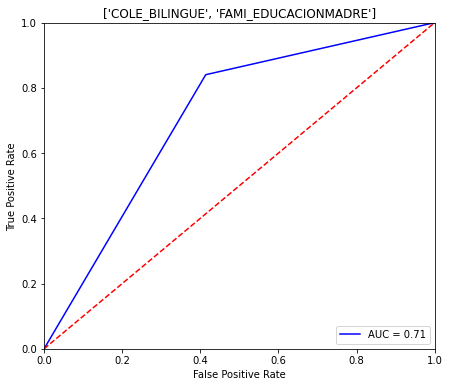

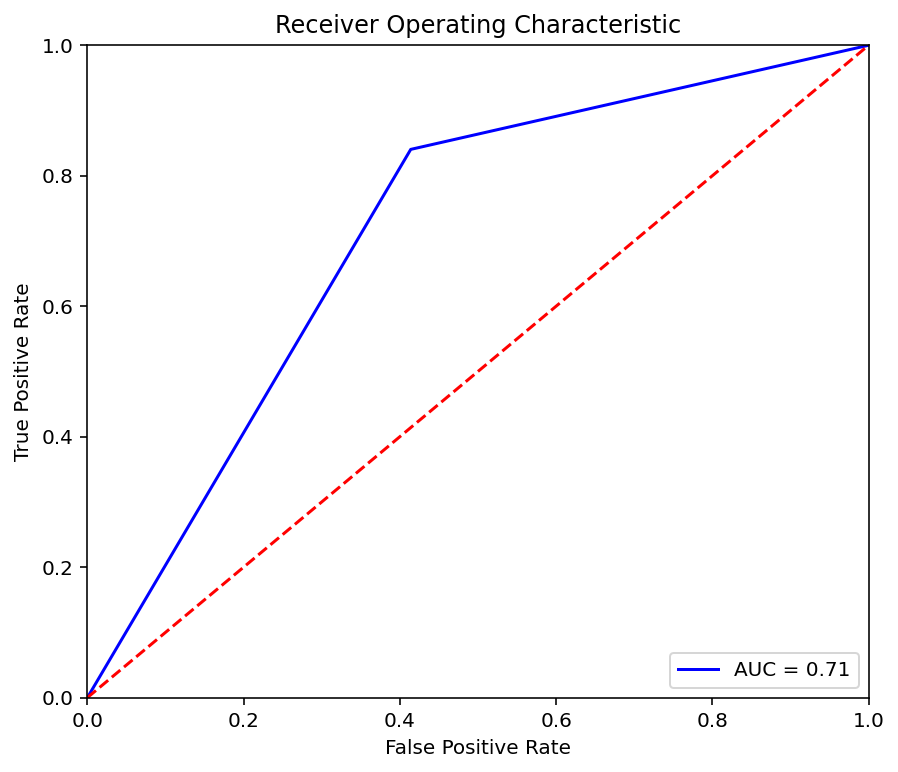

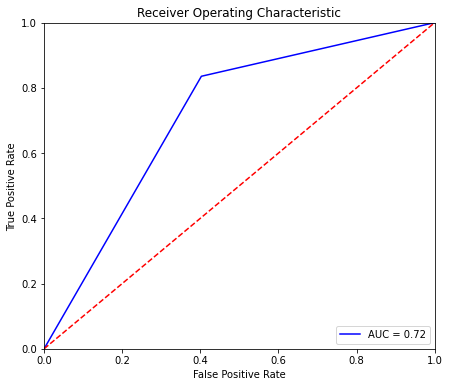

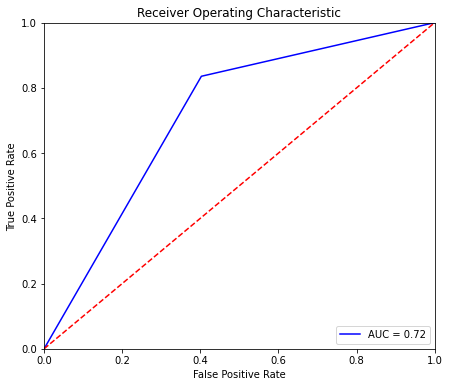

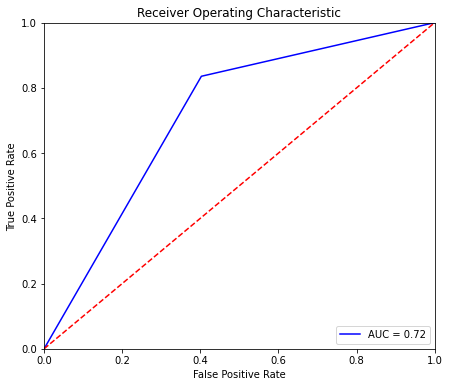

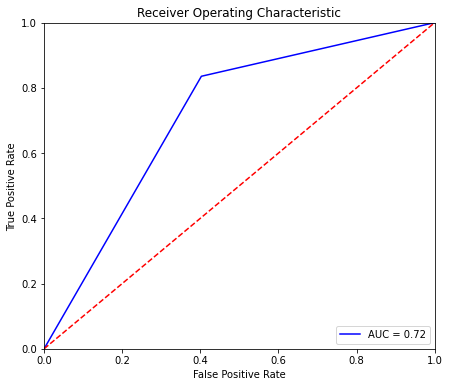

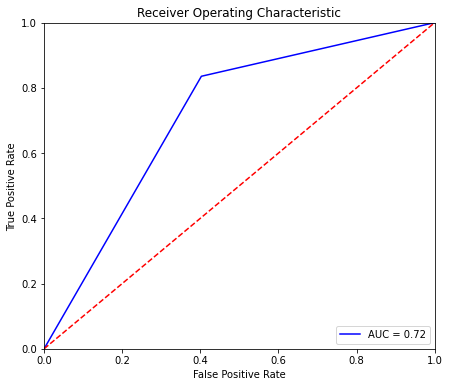

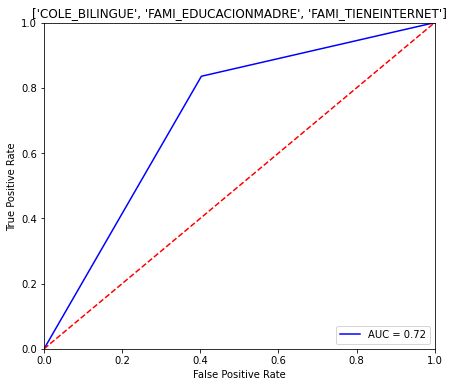

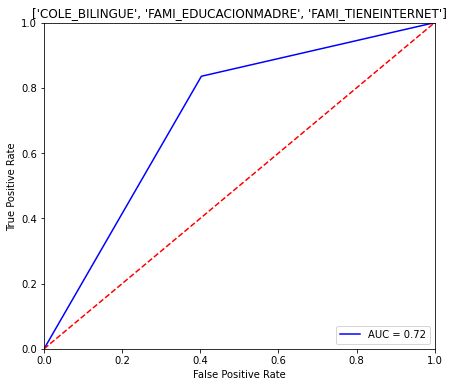

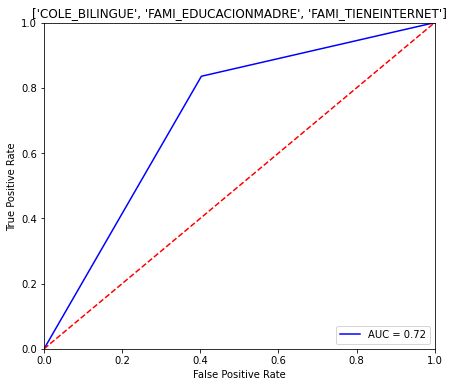

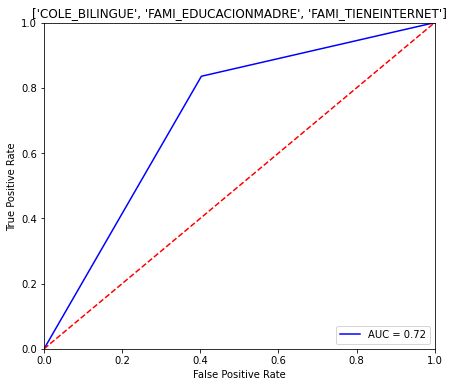

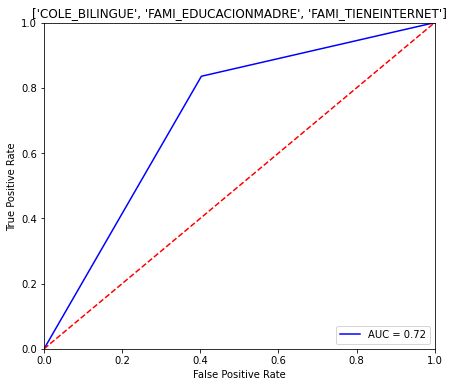

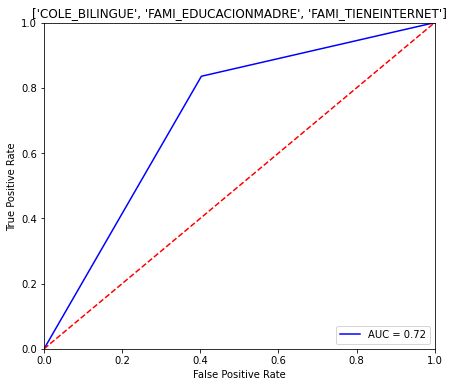

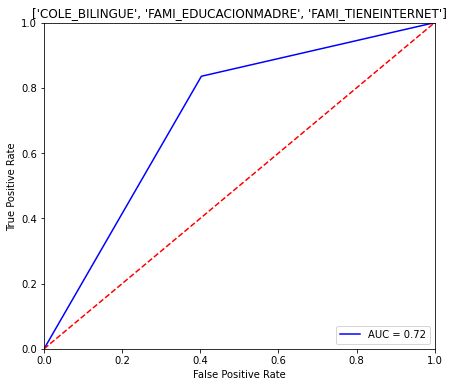

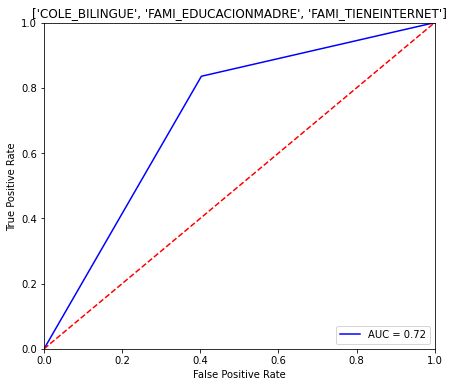

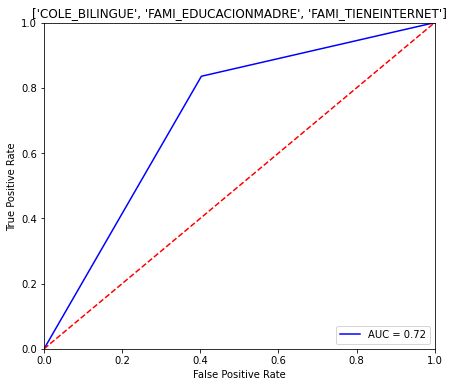

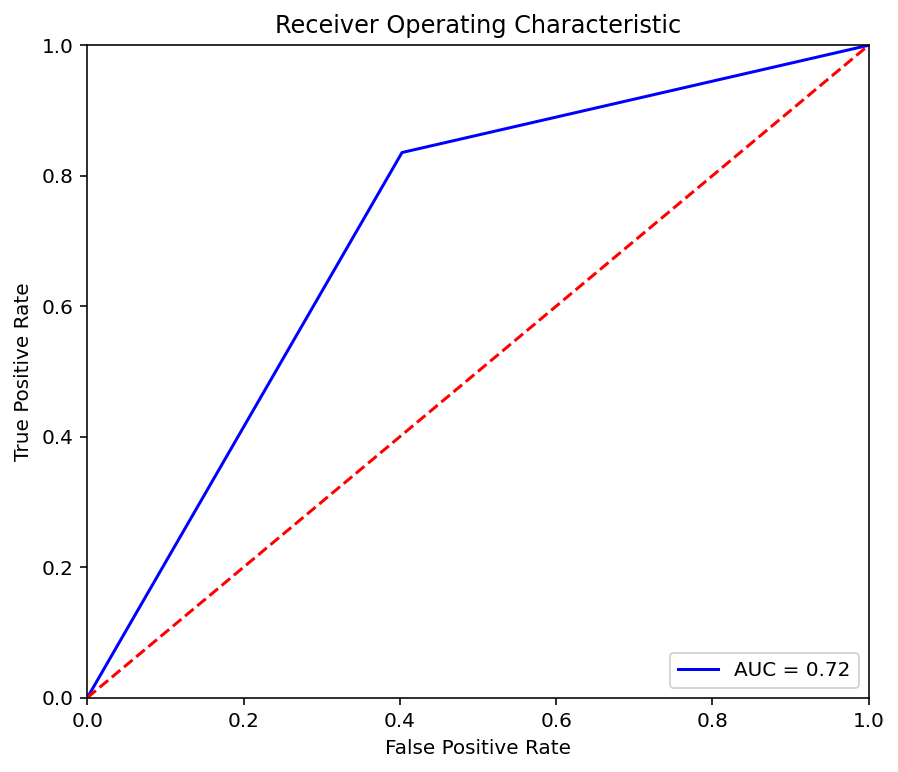

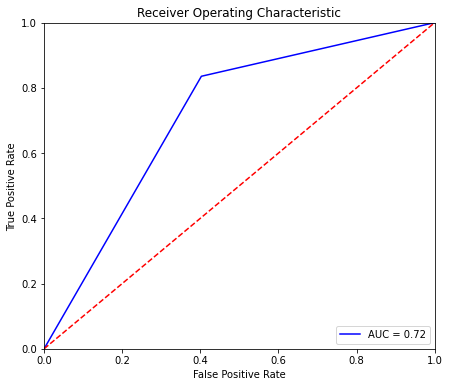

In [127]:
#show_legend = param.Boolean(default=True)
text="Acuracy: "
Texto2= "Nota: Cada vez que se añade o elimina una variable se entrena un modelo, es posible que tarde unos segundos en generar el cambio. En la aprte inferior en al cuadro negro, se pueden ver las variables que estan siendo usadas en los resultados presentados"
tablero_control = pn.Row(pn.Column(titulo,Texto2, SeleccionVariables,  variables, height=500), funcion_interactiva, text, matr)

In [128]:
tablero_control.show()

Launching server at http://localhost:54621
